# Graph Distance Measures

Nima Moghaddas | PHYS 7332 Final Project

Goal of today's class:

1. Understand the basic concept of graph similarity and the difference between descriptors and metrics
2. Understand a few similarity measures, and become familiar with packages which implement them
3. Understand that different measures give us different information and may be appropriate in different settings
4. Appreciate some of the main problems that graph distances can help to address

This lesson draws on [Tantardini et al., 2019](https://doi.org/10.1038/s41598-019-53708-y), [Wills & Meyer, 2020](https://doi.org/10.1371/journal.pone.0228728) and [Hartle et al., 2020](https://doi.org/10.1098/rspa.2019.0744) 

## Interactive activity (Your turn!)

How would you rank these three graphs in terms of similarity? Can you explain why you chose the order you did?

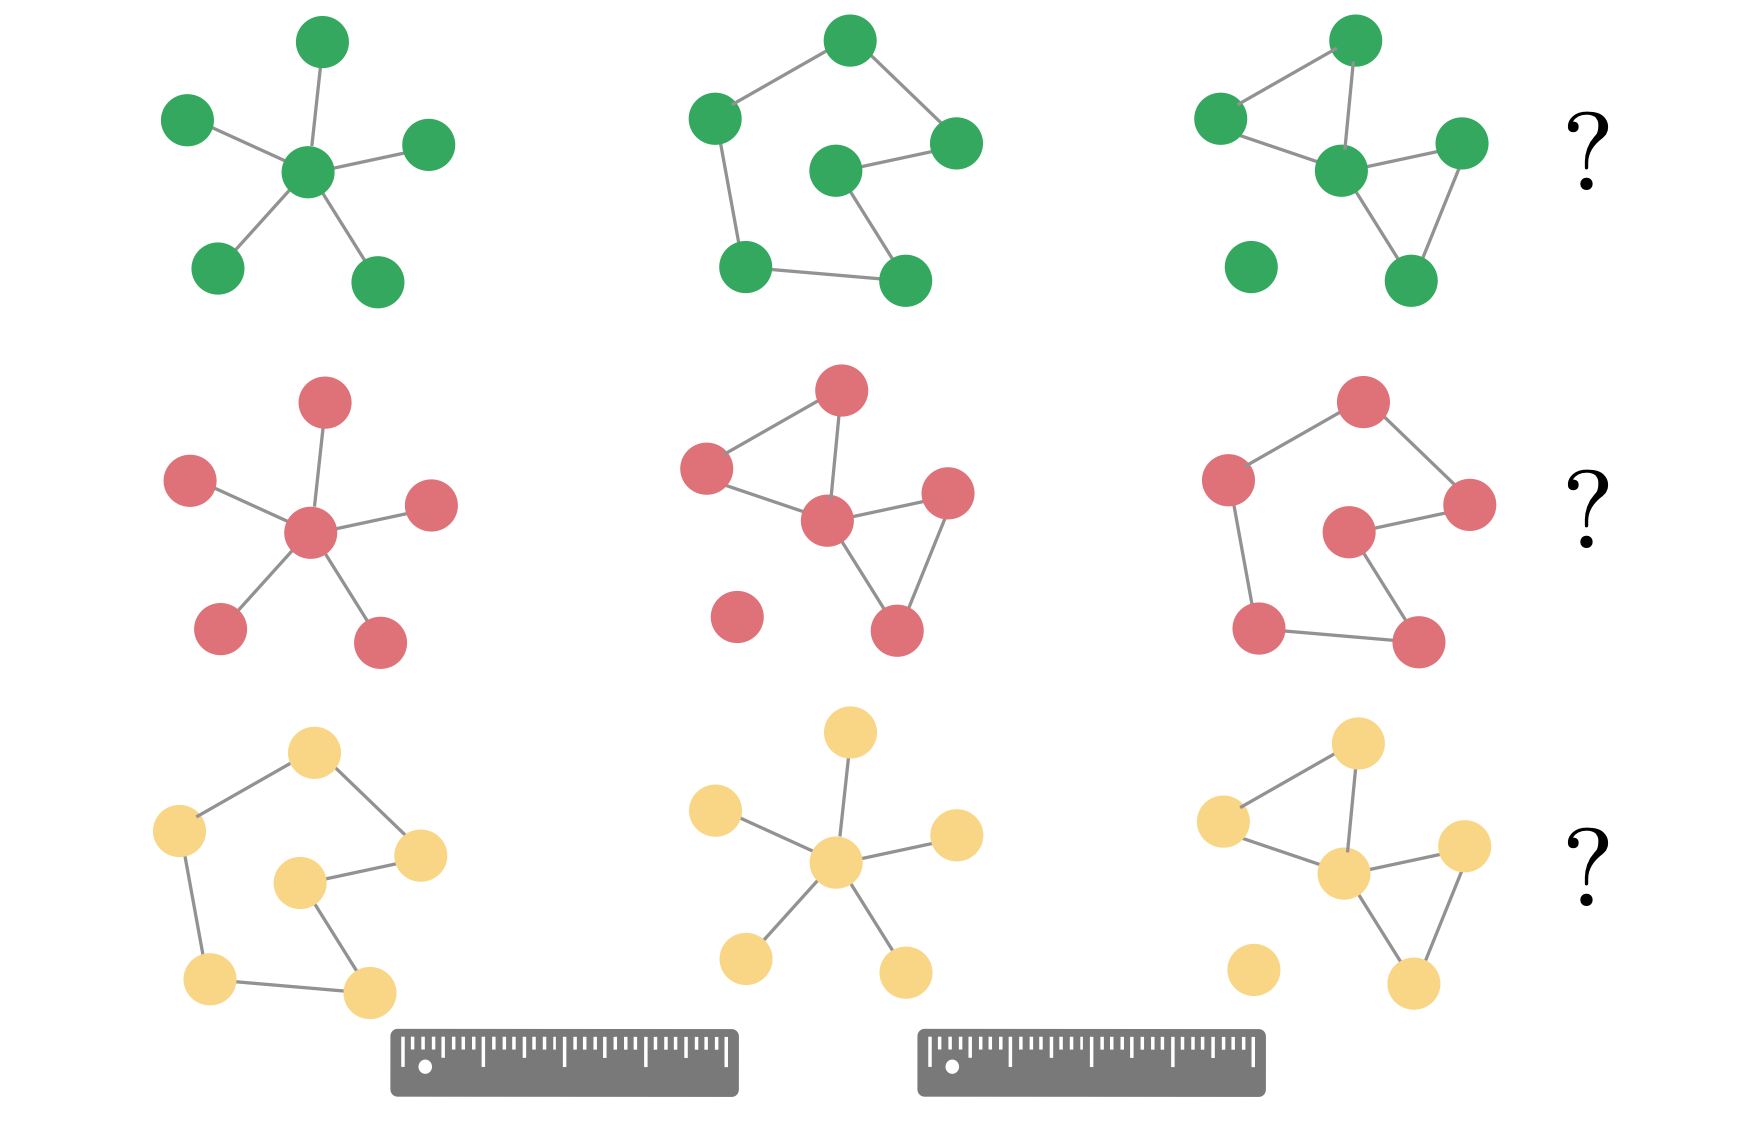

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import pandas as pd

## Introduction
### What is graph distance?

Graphs are complex, high-dimensional objects that encapsulate rich structural information. However, in many applications, we are often interested in simplifying this complexity to address fundamental questions like: "How similar are these two graphs?" The concept of graph distance provides a framework to quantify this similarity (or dissimilarity) by defining a function that maps a pair of graphs to a single scalar value, representing their distance.

At its core, a graph distance measure comprises two key components:
1. A **descriptor**: The descriptor extracts specific properties or features of the graphs that are deemed important for comparison. These properties could range from global characteristics, such as graph diameter or density, to local properties, like node degree distributions or subgraph motifs. Common descriptors include the degree distribution and the adjacency matrix, or its derivatives such as the Laplacian matrix.
2. A **metric**: The metric quantifies the difference between the descriptors of the two graphs. It establishes a numerical distance based on how the extracted features of one graph deviate from those of the other. Common metrics include the euclidian distance, the Jaccard distance and the Shannon entropy.

More formally, given $G_1$ and $G_2$, we seek a descriptor $Q$ and a metric $d$ such that 

$$D(G_1, G_2) =  d(Q(G_1), Q(G_2))$$ 

where $D(G_1, G_2)$ is the distance between the two graphs. The best way to choose $Q$ and $d$ is not straightforward because graphs are complex objects which have lots of properties. The process of devising a graph distance makes inherent assumptions about which properties are most 'important' and with which metric they should be compared. As a result many graph distance measures have been proposed. Each method has its strengths and weaknesses and varies in the type of graphs to which it can be applied.

<!-- 
There are two broad categories of problems when it comes to comparing graphs. Firstly, we may want to compare graphs where the each node in $G_1$ maps on to a node in $G_2$ (**Known Node Correspondence**). For example we may be interested in different types of social interaction that occur between the same set of people, or how the flight patterns between the same set of airports changes over time or between different airlines. Secondly, we may be interested in comparing graphs where there isn't a precise mapping of nodes between the two graphs (**Unknown Node Correspondence**). For example if we wanted to know how similar are the commuting patterns between Boston and San Diego, or how the interaction structure of different protein complexes compares. Or we may be interested in comparing graphs of different sizes. There are different measures for tackling each of these problems. In general, measures for comparing graphs of unknown node correspondence can also be used for graphs with known node correspondence but not vice versa.

Distance measures also differ in the types of graph they work on. Not all measures will work on directed or weighted graphs. -->


### Why do we care?

Graph distance measures are important in a range of applications, such as:

- **Graph Classification**: Grouping graphs into categories based on their similarity (e.g., diagnosing conditions based on brain connectomes).
- **Network Evolution**: Tracking how a network changes over time and identifying anomalies or change points (e.g., comparing the structure of a social network at different time points).
- **Node alignment**: Graph distances can help evaluate how well a proposed alignment preserves structural or functional similarity between nodes. Some alignment methods, such as graph matching or network embedding techniques, rely on graph distance measures to iteratively optimize node mappings.
- **Model Evaluation**: Quantifying how well a generative model replicates real-world networks.
- **Hypothesis Testing**: Comparing the structures of two networks to test a hypothesis (e.g., testing whether two biological networks share similar functional modules).
- **Typicality**: Graph distances can help us understand how representative a given graph is to a given graph ensemble 

And moving towards a better understanding of the fundamentals of networks!




### Jaccard distance

Jaccard distance compares two graphs by computing the overlap between edge sets. The descriptor is the binary adjacency matrix $A \in \{0,1\}^{n \text{x}n}$. The distance between $G_1$ and $G_2$ is the Jaccard distance between their adjacency matrices $A_1$ and $A_2$

$$ D(G_1, G_2) = d(A_1,A_2) = 1 - \frac{|S|}{|T|} $$

where 
- $S = A_1 \cdot A_2$ is the intersection between the edge sets of $G_1$ and $G_2$
- $T = S + (1-A_2) \cdot A_1 + (1-A_1)\cdot A_2$ is the union of the edge sets of $G_1$ and $G_2$

('$\cdot$' denotes element-wise multiplication)

The Jaccard distance requires **known-node correspondence**. This means that there must be a one-to-one mapping of the nodes in $G_1$ to the nodes in $G_2$, otherwise there is no way of knowing if an edge is part of the intersection or union. It also doesn't account for weighted or directed edges in its traditional form.

In [ ]:
def jaccard_distance(G1, G2):
    """
    Calculate the Jaccard distance between two graphs.
    The Jaccard distance is defined as 1 minus the ratio of the size of the intersection 
    of the edge sets to the size of the union of the edge sets.
    Parameters:
    G1 (networkx.Graph): The first graph.
    G2 (networkx.Graph): The second graph.
    Returns:
    float: The Jaccard distance between the two graphs.
    """

    a_1 = nx.to_numpy_array(G1) # convert G1 to adjacency matrix
    a_2 = nx.to_numpy_array(G2) # convert G2 to adjacency matrix
    s_12 = a_1*a_2 # intersection of edges in a_1 and a_2
    t_12 = s_12 + (1-a_2)*a_1 + (1-a_1)*a_2 # union of edges in a_1 and a_2
    S = np.sum(s_12) # total number of edges in intersection
    T = np.sum(t_12) # total number of edges in union

    return 1 - S/T

#### What properties might a distance measure have?
We can probably think of some properties that we might like a distance measure to have. These are all arguable to some extent, but some such properties are

1. **Identity property**: the distance between the same graph (or two isomorphic graphs) should be 0 ie. $D(G_1, G_1) = 0$. 

2. **Zero property**: given $G$ and $\overline{G}$ where $\overline{G}$ contains all the edges which $G$ does not contain, we might expect that $D(G,\overline{G})$ is maximal.


In [3]:
G = nx.gnp_random_graph(1000, 0.05)
d = jaccard_distance(G, G)
print(f'D(G, G) = {d:.2f}')
G_prime = nx.complement(G)
d = jaccard_distance(G, G_prime)
print(f'D(G, G\') = {d:.2f}')

D(G, G) = 0.00
D(G, G') = 1.00


3. **Symmetry property**: we might expect that $D(G_1, G_2) = D(G_2, G_1)$

In [4]:
G1 = nx.watts_strogatz_graph(100, 4, 0.1)
G2 = nx.watts_strogatz_graph(100, 4, 0.2)
d_12 = jaccard_distance(G1, G2)
print(f'D(G1, G2) = {d_12:.5f}')
d_21 = jaccard_distance(G2, G1)
print(f'D(G2, G1) = {d_21:.5f}')

D(G1, G2) = 0.44358
D(G2, G1) = 0.44358


4. **Sensitivity to perturbation**: If we perturb a graph $G$ slightly (eg adding/removing edges) resulting in $G'$ we might expect $D(G, G')$ to start off close to 0 and grow as the perturbation increases.

In [ ]:
# Helper functions for perturbations
def remove_random_edge(graph):
    """Remove a random edge from the graph."""
    if len(graph.edges()) > 0:
        edge = random.choice(list(graph.edges()))
        graph.remove_edge(*edge)

def add_random_edge(graph):
    """Add a random edge to the graph that is not already present."""
    nodes = list(graph.nodes())  # Convert nodes view to a list
    while True:
        u, v = random.sample(nodes, 2)
        if not graph.has_edge(u, v):
            graph.add_edge(u, v)
            break

def rewire_random_edge(graph):
    """Rewire a random edge to a new random connection."""
    if len(graph.edges()) > 0:
        edge = random.choice(list(graph.edges()))
        graph.remove_edge(*edge)
        add_random_edge(graph)

def rewire_preserve_degree(graph):
    """Rewire edges randomly while preserving node degrees."""
    nx.double_edge_swap(graph, nswap=1, max_tries=1000)

In [9]:
# Generalized perturbation function
def perturb_and_measure(base_graph, perturbation_func, distance_func, iterations=100):
    """
    Applies a perturbation function to a copy of the base graph and measures distances.
    
    Parameters:
        base_graph: The original graph.
        perturbation_func: The function to perturb the graph.
        distance_func: The function to compute distance between graphs.
        iterations: Number of perturbation steps.
        
    Returns:
        List of distances after each perturbation.
    """
    perturbed_graph = base_graph.copy()
    distances = [distance_func(base_graph, perturbed_graph)]  # Initial distance
    for _ in range(iterations):
        perturbation_func(perturbed_graph)
        distances.append(distance_func(base_graph, perturbed_graph))
    return distances

# Initialize graphs
er = nx.gnp_random_graph(1000, 0.02)
ba = nx.barabasi_albert_graph(1000, 3)
ws = nx.watts_strogatz_graph(1000, 10, 0.02)

# Define distance metric
distance_func = jaccard_distance

# Define perturbation experiments
perturbations = {
    "remove_edge": remove_random_edge,
    "add_edge": add_random_edge,
    "rewire_edge": rewire_random_edge,
    "rewire_preserve_degree": rewire_preserve_degree
}

# Run experiments
results = {}
iterations = 100

for perturbation_name, perturbation_func in perturbations.items():
    results[f"er_{perturbation_name}"] = perturb_and_measure(er, perturbation_func, distance_func, iterations)
    results[f"ba_{perturbation_name}"] = perturb_and_measure(ba, perturbation_func, distance_func, iterations)
    results[f"ws_{perturbation_name}"] = perturb_and_measure(ws, perturbation_func, distance_func, iterations)




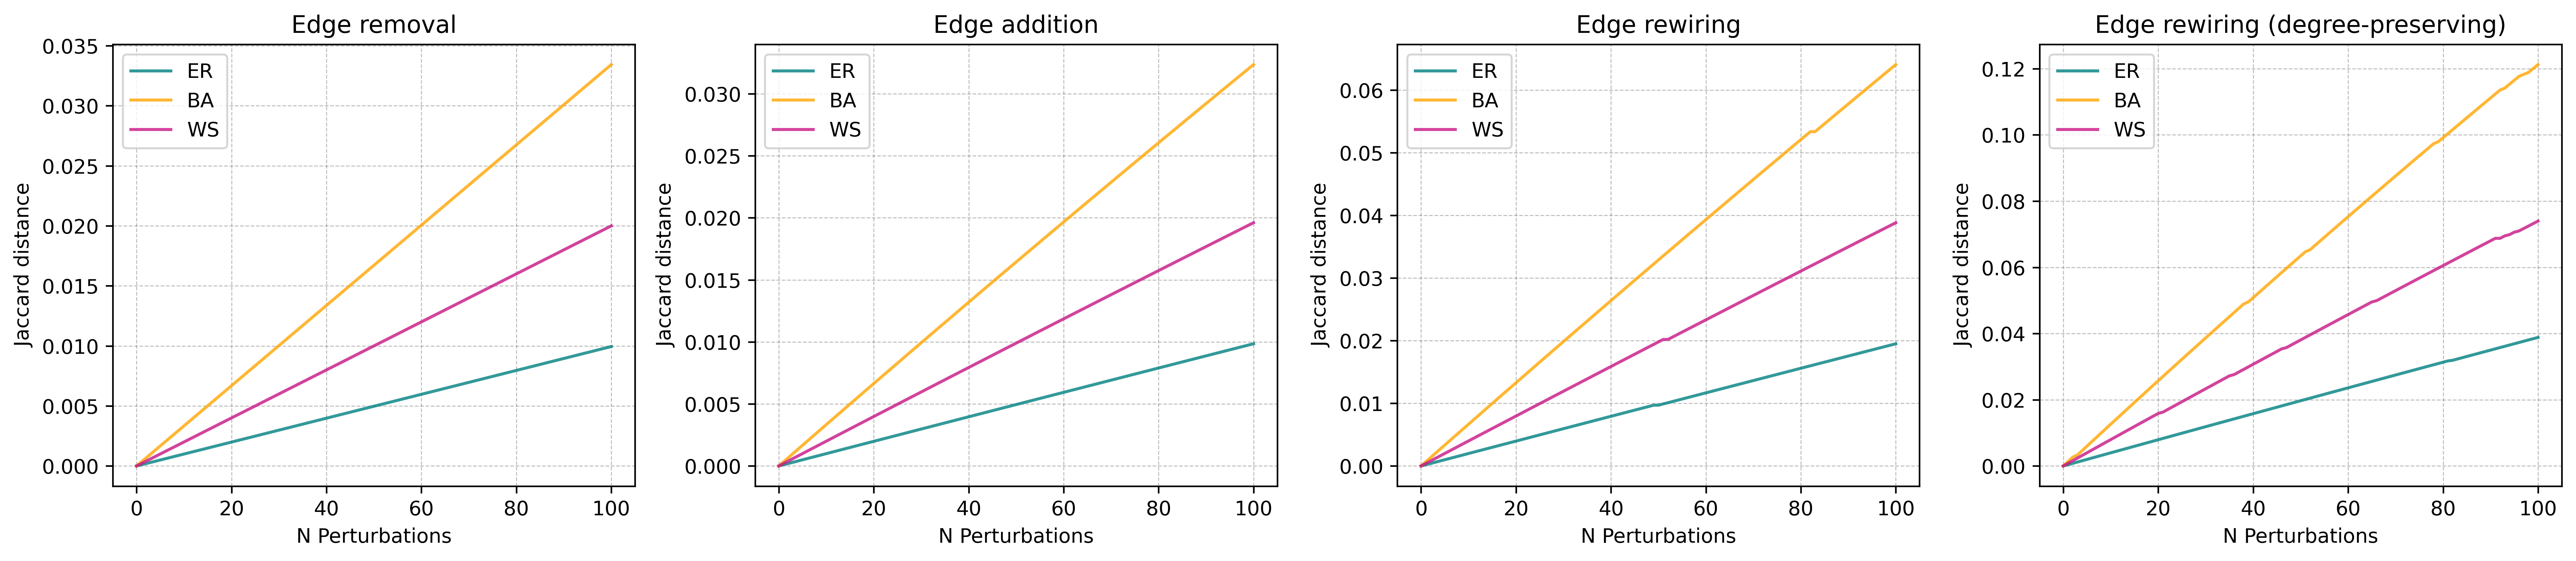

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4), dpi=425)

# Define colors and labels
colors = {'ER': 'teal', 'BA': 'orange', 'WS': 'mediumvioletred'}
graphs = ['er', 'ba', 'ws']

# Plot each perturbation type
perturbation_types = ['remove_edge', 'add_edge', 'rewire_edge', 'rewire_preserve_degree']
titles = ['Edge removal', 'Edge addition', 'Edge rewiring', 'Edge rewiring (degree-preserving)']

for i, perturbation in enumerate(perturbation_types):
    for graph in graphs:
        label = graph.upper()
        ax[i].plot(results[f"{graph}_{perturbation}"], color=colors[label], alpha=0.8, label=label)
    
    # Formatting each subplot
    ax[i].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('N Perturbations')
    ax[i].set_ylabel('Jaccard distance')
    ax[i].legend()

# Show the plot
plt.tight_layout()
plt.show()


5. **Irrelevance of random differences**: If we perturb a graph $G$ by randomizing edges resulting in $G'$, we might expect the distance $D(G, G')$ to asymptote as the graph becomes fully randomized.

In [11]:
# Initialize graphs
er = nx.gnp_random_graph(100, 0.02)
ba = nx.barabasi_albert_graph(100, 3)
ws = nx.watts_strogatz_graph(100, 10, 0.02)

# Initialize distance lists
d_er_rewire = []
d_ba_rewire = []
d_ws_rewire = []

g_er = er.copy()
g_ba = ba.copy()
g_ws = ws.copy()

# Perform perturbations
iterations = 1000
for i in range(iterations):
    # Randomly choose a perturbation type for each graph
    rewire_random_edge(g_er)
    d_er_rewire.append(distance_func(er, g_er))

    rewire_random_edge(g_ba)
    d_ba_rewire.append(distance_func(ba, g_ba))

    rewire_random_edge(g_ws)
    d_ws_rewire.append(distance_func(ws, g_ws))

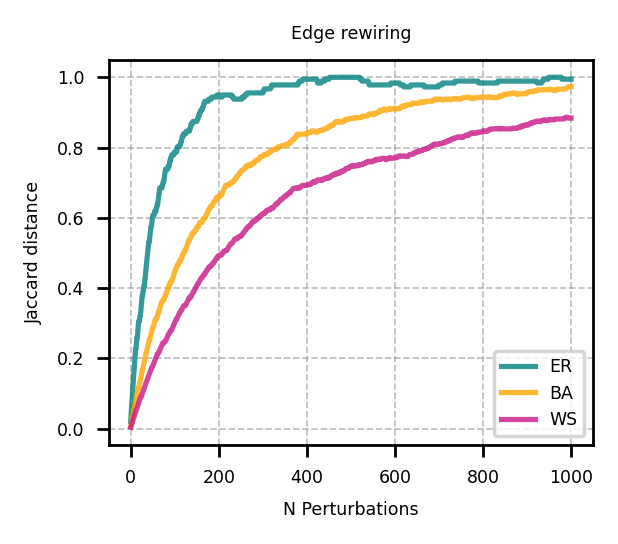

In [12]:
fig, ax = plt.subplots(1,1, figsize=(2.5,2), dpi = 250)
ax.plot(d_er_rewire, color = 'teal', alpha = 0.8, label = 'ER')
ax.plot(d_ba_rewire, color = 'orange', alpha = 0.8, label = 'BA')
ax.plot(d_ws_rewire, color = 'mediumvioletred', alpha = 0.8, label = 'WS')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax.set_title('Edge rewiring', fontsize = 5)
ax.set_xlabel('N Perturbations', fontsize = 5)
ax.set_ylabel('Jaccard distance', fontsize = 5)
ax.tick_params(axis='both', which='major', labelsize=5)
#ax[2].set_ylim(-0.001,0.12)
ax.legend(fontsize = 5)

### Note on Graph Distances and Formal Metrics

When discussing graph distances, it is important to note that the term "distance" is often used informally in the context of graph theory and network science. While "distance" suggests a formal mathematical metric, many graph distance measures do not satisfy all the properties required for a true metric.

A **metric** is a function $d(x, y)$ between elements $x$ and $y$ that satisfies the following properties:  
1. **Non-negativity**: $d(x, y) \geq 0$
2. **Identity of indiscenribles**: $d(x, y) = 0$ if and only if $x = y$.  
2. **Symmetry**: $d(x, y) = d(y, x)$.  
3. **Triangle inequality**: $d(x, y) + d(y, z) \geq d(x, z)$.  

However, many graph distance measures:  
- May not strictly satisfy the **triangle inequality**.  
- Can have $d(x, y) = 0$ for $x \neq y$, similar to **pseudometrics**.  

Despite these deviations, the term "graph distance" is widely used to describe dissimilarity measures between graphs, even if they lack some formal metric properties.


### Intro NetRD!

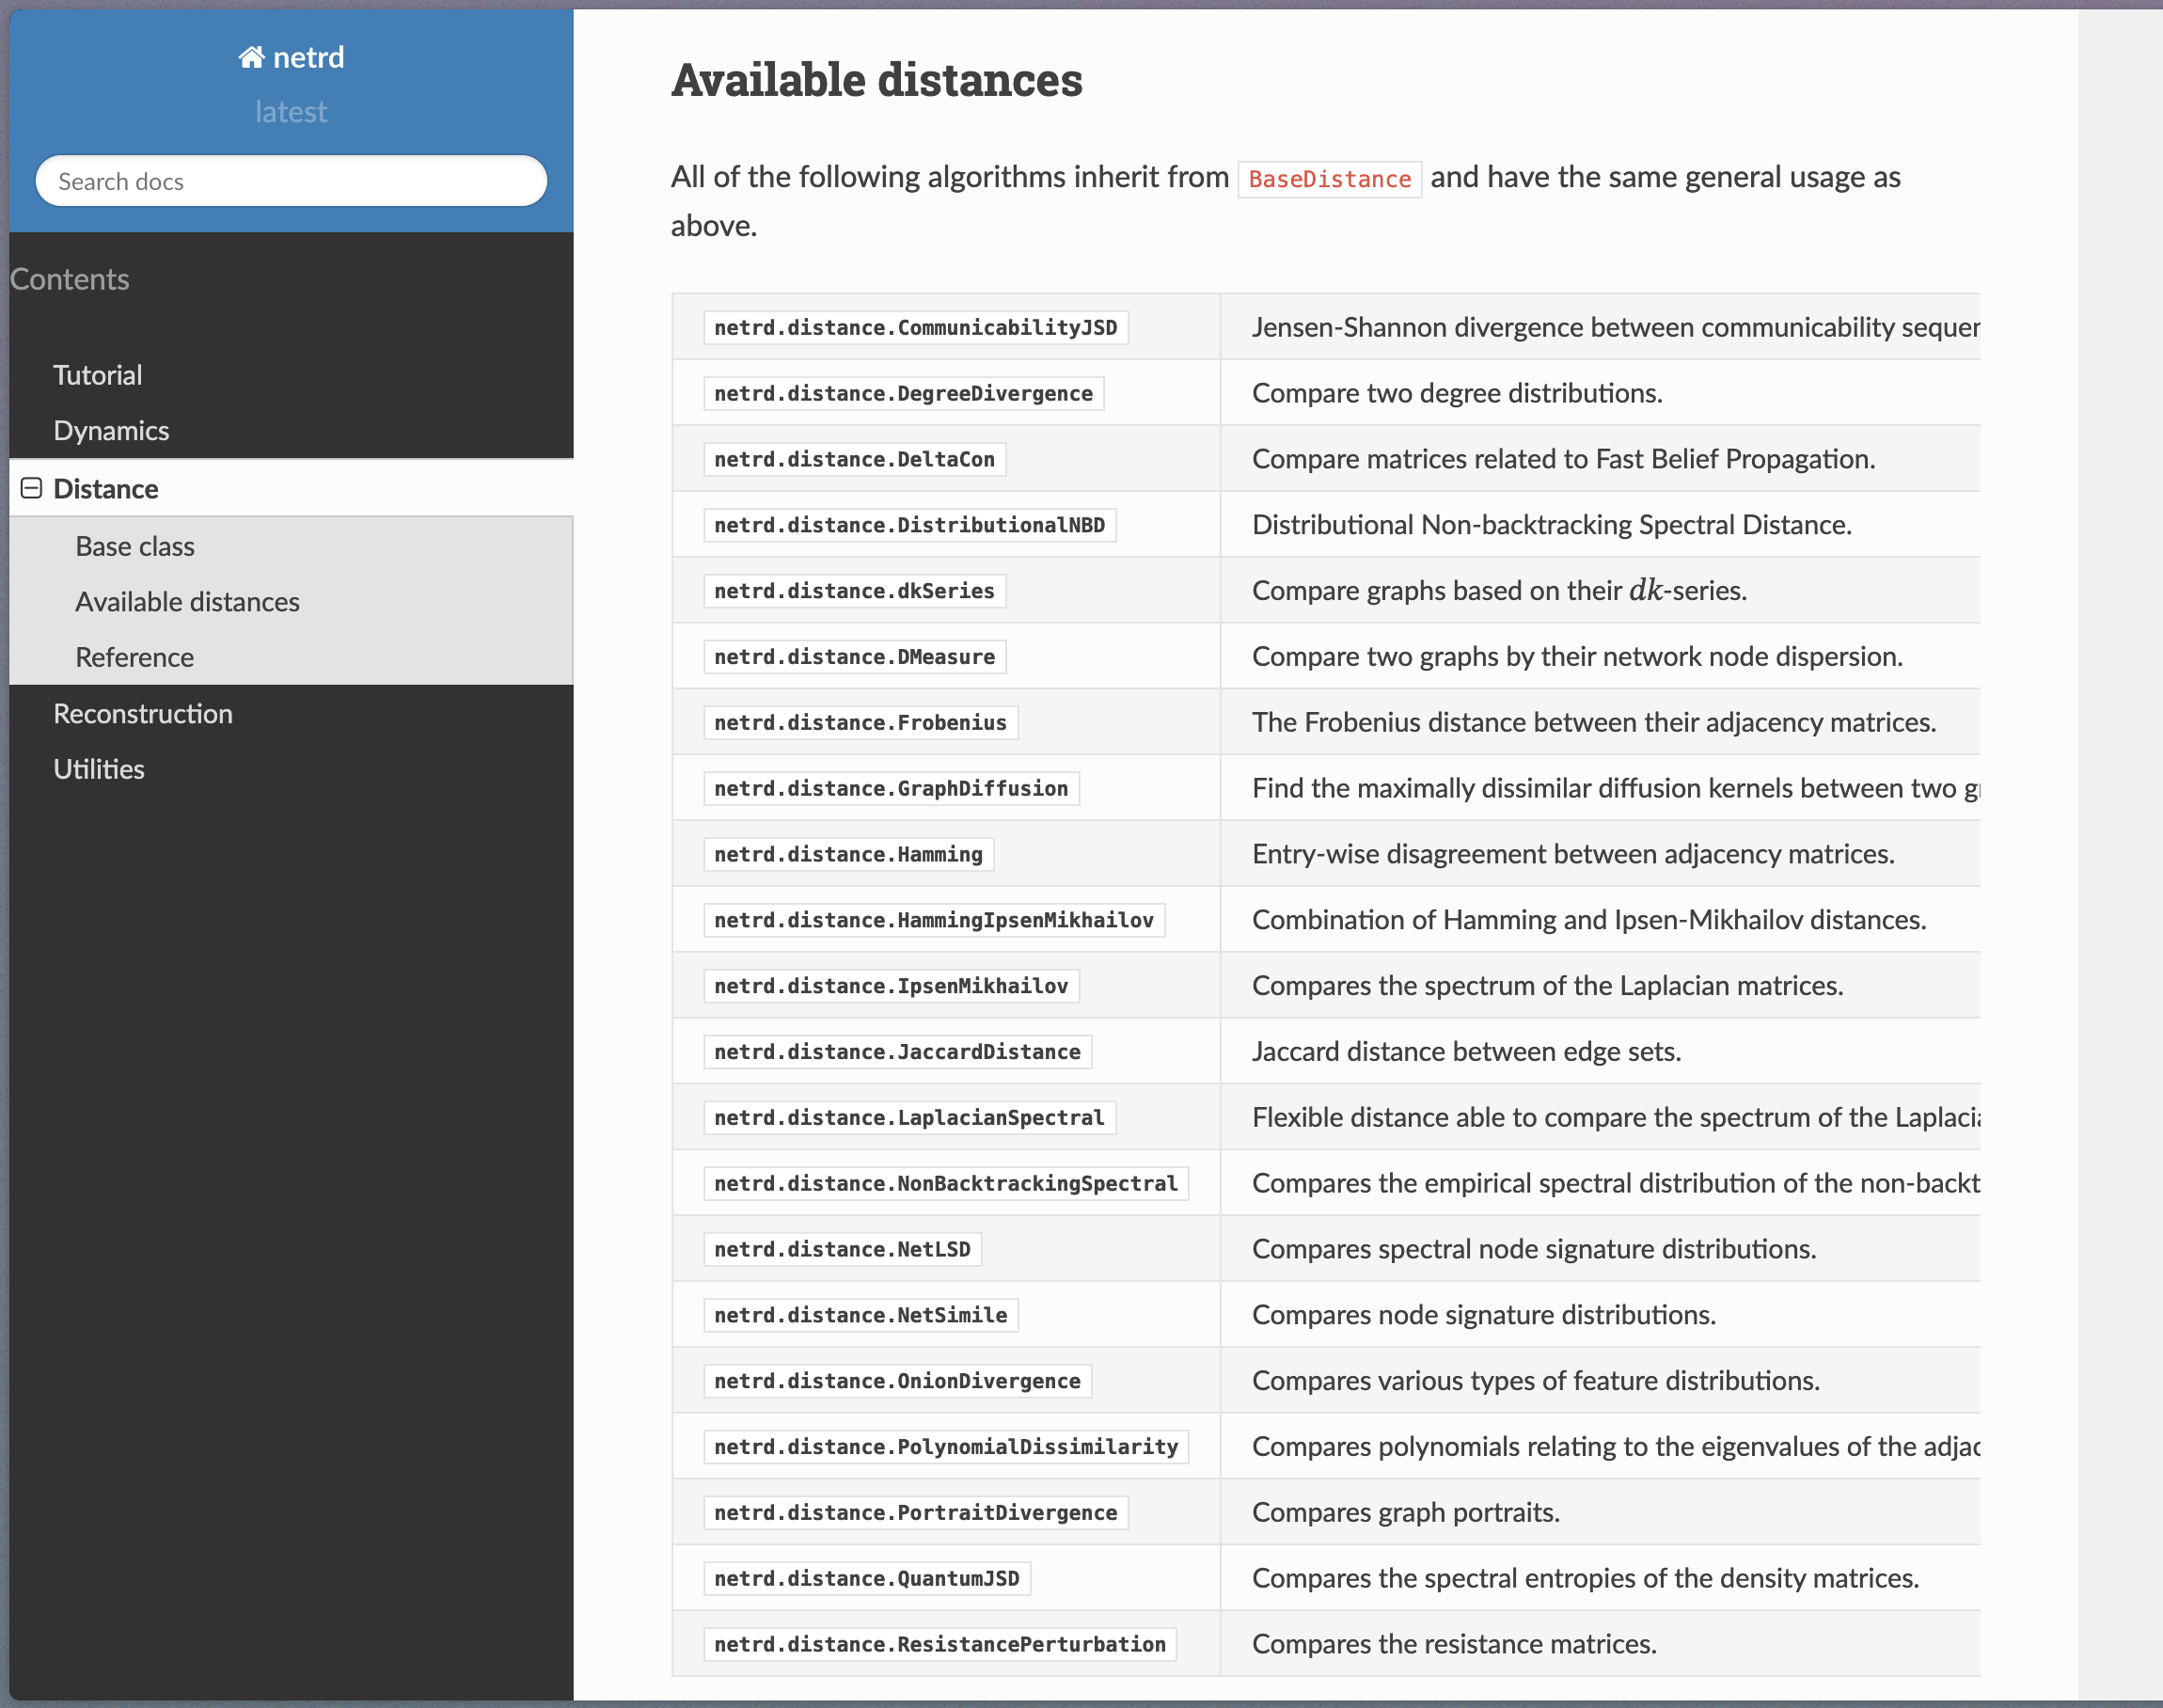

In [17]:
import netrd
g1 = nx.watts_strogatz_graph(200, 4, 0.1)
g2 = nx.watts_strogatz_graph(200, 4, 0.2)
jd = netrd.distance.JaccardDistance()
jd.dist(g1, g2)

0.4344422700587084

In [18]:
jaccard_distance(g1, g2)

0.4344422700587084

### Degree Jensen-Shannon Divergence 

Degree Jensen-Shannon Divergence compares the the degree distributions of two graphs. For a graph of $n$ nodes, the descriptor is the degree distribution $\mathbf{p} = p_k(G) = \frac{n_k(G)}{n}$ where $n_k(G)$ is the number of nodes of degree $k$ in the graph. The distance between two degree distributions $\mathbf{p_1}$ and $\mathbf{p_2}$ then calculated as 
$$ D(G_1, G_2) = H[\mathbf{p_+}] - \frac{1}{2} (H[\mathbf{p_1}] + H[\mathbf{p_2}])$$
where
- $\mathbf{p_+} = \frac{\mathbf{p_1} + \mathbf{p_2}}{2}$ is the **mixture distribution**, representing the average of the two degree distributions.
- $H[\mathbf{p}] = - \sum_k p_k \ln p_k$ is the Shannon entropy of a degree distribution, which quantifies the uncertainty or disorder of the distribution. 

**Entropy** is a measure of the uncertainty or diversity in a distribution. In the context of degree sequences, entropy quantifies the unpredictability of a node's degree in a graph. If the degree distribution is highly heterogeneous the entropy will be higher because the degree of nodes is less predictable. On the other hand, if the degree distribution is more homogeneous (i.e., nodes have similar degrees), the entropy will be lower because the degree of a node is more predictable.

One key advantage of Degreee JSD over the Jaccard distance is that it works on networks with **unknown node correspondence**.

In [25]:
from collections import Counter
def jensen_shannon_divergence(g1, g2):
    def ordered_degree_counts(g):
        """Given a graph, return an ordered, normalized list of degree counts."""
        degrees = [g.degree(n) for n in g.nodes()]
        degree_counts = Counter(degrees)
        degree_counts_ordered = [degree_counts[v] for v in range(max(degrees) + 1)]
        total_nodes = sum(degree_counts_ordered)
        return [count / total_nodes for count in degree_counts_ordered]  # Normalize

    def entropy(p):
        """Calculate the entropy of a probability distribution."""
        return -sum(pk * np.log2(pk) for pk in p if pk != 0)

    # Get normalized degree distributions
    p1 = ordered_degree_counts(g1)
    p2 = ordered_degree_counts(g2)

    # Pad distributions to the same length
    max_len = max(len(p1), len(p2))
    p1.extend([0] * (max_len - len(p1)))
    p2.extend([0] * (max_len - len(p2)))

    # Calculate the intermediate distribution and JS divergence
    p_plus = [(p1k + p2k) / 2 for p1k, p2k in zip(p1, p2)]
    D = entropy(p_plus) - 0.5 * (entropy(p1) + entropy(p2))

    return D


In [26]:
g1 = nx.gnp_random_graph(1000, 0.05)
g2 = nx.gnp_random_graph(1000, 0.05)

jensen_shannon_divergence(g1, nx.complement(g1))

0.9999999999999991

In [27]:
jensen_shannon_divergence(g1,g1)

0.0

In [33]:
# Generalized perturbation function
def perturb_and_measure(base_graph, perturbation_func, distance_func, iterations=100):
    """
    Applies a perturbation function to a copy of the base graph and measures distances.
    
    Parameters:
        base_graph: The original graph.
        perturbation_func: The function to perturb the graph.
        distance_func: The function to compute distance between graphs.
        iterations: Number of perturbation steps.
        
    Returns:
        List of distances after each perturbation.
    """
    perturbed_graph = base_graph.copy()
    distances = [distance_func(base_graph, perturbed_graph)]  # Initial distance
    for _ in range(iterations):
        perturbation_func(perturbed_graph)
        distances.append(distance_func(base_graph, perturbed_graph))
    return distances

# Initialize graphs
er = nx.gnp_random_graph(1000, 0.02)
ba = nx.barabasi_albert_graph(1000, 3)
ws = nx.watts_strogatz_graph(1000, 10, 0.02)

# Define distance metric
distance_func = jensen_shannon_divergence

# Define perturbation experiments
perturbations = {
    "remove_edge": remove_random_edge,
    "add_edge": add_random_edge,
    "rewire_edge": rewire_random_edge,
    "rewire_preserve_degree": rewire_preserve_degree
}

# Run experiments
results = {}
iterations = 100

for perturbation_name, perturbation_func in perturbations.items():
    results[f"er_{perturbation_name}"] = perturb_and_measure(er, perturbation_func, distance_func, iterations)
    results[f"ba_{perturbation_name}"] = perturb_and_measure(ba, perturbation_func, distance_func, iterations)
    results[f"ws_{perturbation_name}"] = perturb_and_measure(ws, perturbation_func, distance_func, iterations)

# Access results as needed, e.g.:
# print(results["er_remove_edge"])


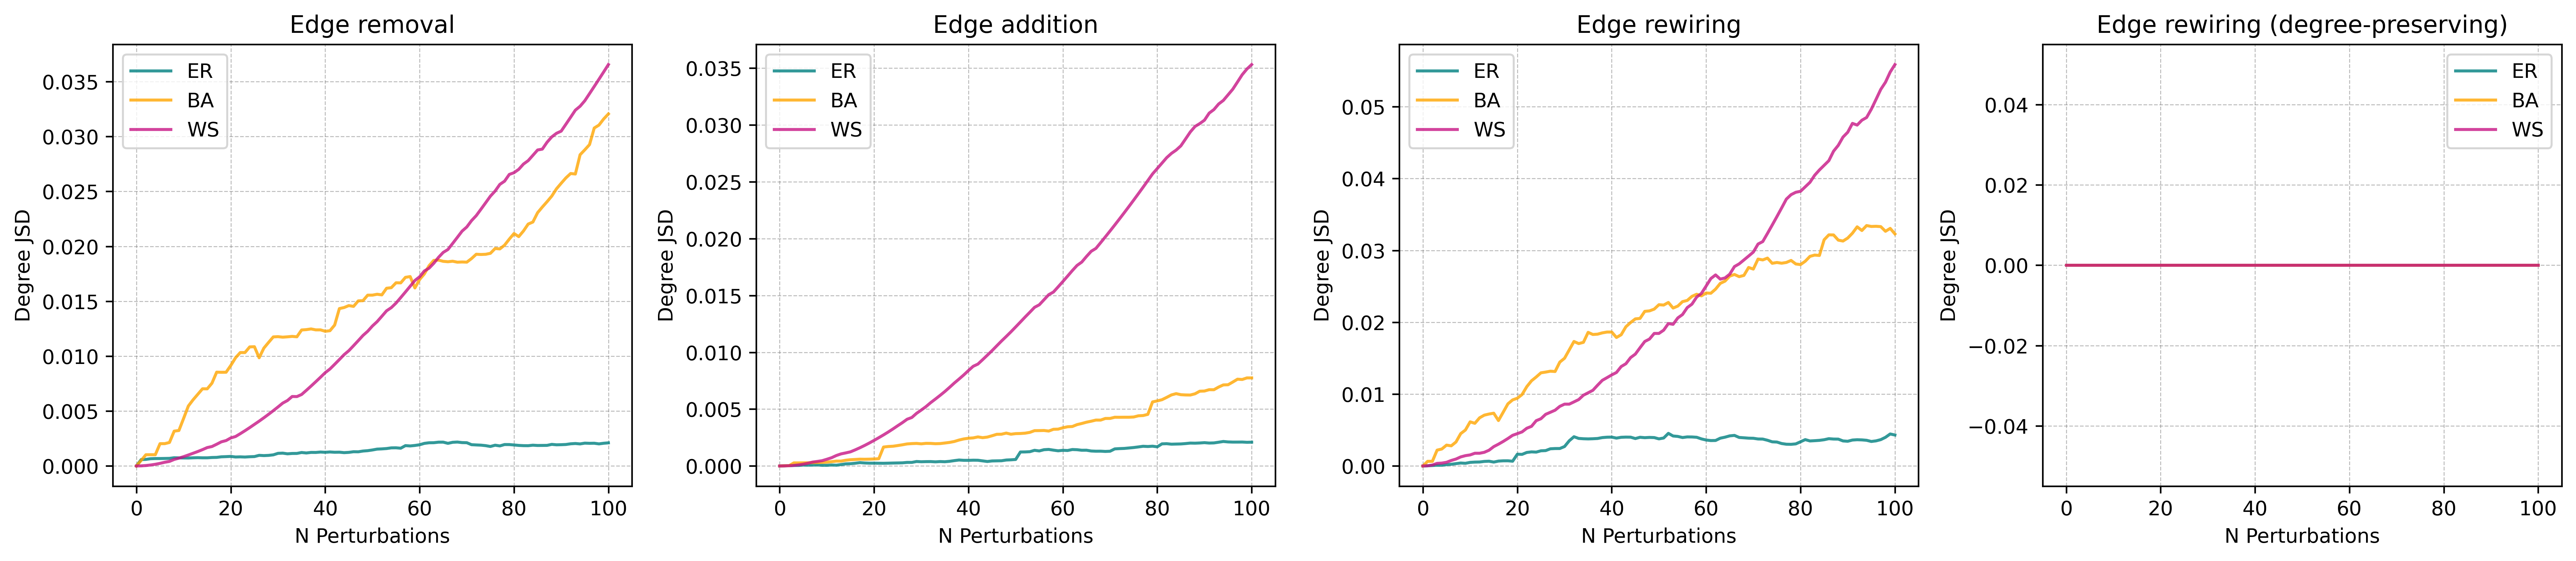

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4), dpi=425)

# Define colors and labels
colors = {'ER': 'teal', 'BA': 'orange', 'WS': 'mediumvioletred'}
graphs = ['er', 'ba', 'ws']

# Plot each perturbation type
perturbation_types = ['remove_edge', 'add_edge', 'rewire_edge', 'rewire_preserve_degree']
titles = ['Edge removal', 'Edge addition', 'Edge rewiring', 'Edge rewiring (degree-preserving)']

for i, perturbation in enumerate(perturbation_types):
    for graph in graphs:
        label = graph.upper()
        ax[i].plot(results[f"{graph}_{perturbation}"], color=colors[label], alpha=0.8, label=label)
    
    # Formatting each subplot
    ax[i].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('N Perturbations')
    ax[i].set_ylabel('Degree JSD')
    ax[i].legend()

# Show the plot
plt.tight_layout()
plt.show()


#### Why stop with the degree distribution? 
While differences in the degree distribution capture important differences between networks, theres many network properties and distributions that are also important. In theory we could add more and more such properties into our descriptor when constructing a graph distance measure. This is exactly what **NetSimile** does. NetSimile first constructs a 7x5 feature matrix which contains the median, mean, standard deviation, skewness and kurtosis of the degree distribution, clustering coefficient distribution, two-hop neighbor distribution, average clustering coefficient, and three features about node $i$'s egonet. You can read more about it here:
- Berlingerio, M., Koutra, D., Eliassi-Rad, T., Faloutsos, C., 2012. NetSimile: A Scalable Approach to Size-Independent Network Similarity. https://doi.org/10.48550/ARXIV.1209.2684


### Your turn! 
Choose a network property that is interesting to you, or multiple properties, and construct a distance measure using them. Test if your distance measure satisfies the properties mentioned above (symmetry, zero, identity) and perform one of the perturbation tests using your distance measure.

In [ ]:
def distance_measure(G1, G2):
    """
    """
    pass

## DeltaCon: A Graph Distance Measure Based on Random Walks
DeltaCon is a graph distance measure based on the behavior of random walks on the graphs. It is particularly useful in capturing the structural similarity between graphs, with a focus on how nodes and edges are connected through their local and global neighborhoods. DeltaCon works by quantifying the differences between the graph distance matrices induced by random walks, allowing it to highlight important structural features and similarities between graphs.

The DeltaCon measure is based on the following formula for computing the similarity $s_{ij}$ between nodes $i$ and $j$ in two graphs:
$$s_{ij} = [I - \epsilon^2 E - \epsilon A]^{-1}$$
where
- $I$ is the $n$ x $n$ identity matrix, representing the diagonal matrix of ones.
- $E$ is the diagonalized degree matrix ($E_{ii}$ is the degree of node $i$, all other entries are 0)
- $A$ is the adjacency matrix
- $\epsilon$ is a regularization parameter that controls the strength of the contributions from the degree matrix and the adjacency matrix.

The idea behind this formula is that it captures the **reachability** between nodes using random walks, where the walk is influenced by both the degree of the nodes and the adjacency (the actual edges between them). By adjusting the regularization parameter $\epsilon$, you can control the balance between the graph's local structure (the degree distribution) and its actual connectivity (the edges themselves).

#### Matrix Inversion as a Sum of Random Walk Contributions

The inverse of $ [I - \epsilon^2 D - \epsilon A] $ can be expanded as a Neumann series, assuming the matrix is invertible (this is guaranteed if $\epsilon$ is small enough):

$$
[I - \epsilon^2 D - \epsilon A]^{-1} = I + \left[\epsilon^2 D + \epsilon A\right] + \left[\epsilon^2 D + \epsilon A\right]^2 + \left[\epsilon^2 D + \epsilon A\right]^3 + \dots
$$

This expansion has a direct interpretation in terms of **random walks**:

- Each term in the series corresponds to a contribution from paths of increasing length in the graph.
- The first term $I$ represents self-loops (paths of length 0).
- The second term $\left[\epsilon^2 D + \epsilon A\right]$ captures direct connections (paths of length 1).
- Higher-order terms $ \left[\epsilon^2 D + \epsilon A\right]^n$ account for paths of length $ n $, with contributions diminishing as \$n$ increases due to the damping factor $ \epsilon $.

Thus, the matrix inverse effectively sums over all possible paths between nodes, with shorter paths contributing more significantly due to the damping.
- For each pair of nodes $i $ and $j $, the entry $s_{ij} $ quantifies how reachable node $ j $ is from node $ i $ when considering all possible walks, weighted by their lengths.
---


#### Advantages of DeltaCon
- **Sensitivity to Node and Edge Importance**: DeltaCon is particularly sensitive to the structure of the graph, capturing not just the presence of edges but also the relative importance of nodes and edges.
- **Edge Weights**: DeltaCon can also be extended to account for weighted edges. If the graph has edge weights, the adjacency matrix $A$ can be replaced with a weighted adjacency matrix where the values represent the weights of the edges.
- **Global and Local Connectivity**: By incorporating both the degree matrix and the adjacency matrix, DeltaCon balances local connectivity (nodes with high degrees) and global connectivity (the actual edges that connect nodes) in its computation, making it sensitive to both local structures and the global topology of the graph.

#### Drawbacks 

- Requires both graphs to have the **same number of nodes**
- Assumes **known node correspondence**


In [ ]:
def deltacon(g1, g2):
    """
    Calculate the DeltaCon distance between two graphs.

    DeltaCon is a graph distance measure based on random walk behavior,
    which computes the structural similarity between two graphs by comparing
    their node connectivity patterns. The DeltaCon distance is based on the 
    Matusita distance between the similarity matrices of the two graphs, 
    which are derived from the graphs' adjacency matrices and degree matrices.

    Parameters:
    -----------
    g1 : networkx.Graph
        The first graph to compare.
    g2 : networkx.Graph
        The second graph to compare.

    Returns:
    --------
    float
        The DeltaCon distance between the two graphs, which quantifies their structural similarity.

    Notes:
    ------
    - The function computes the degree matrix for each graph, as well as the adjacency matrix.
    - The DeltaCon distance is based on a regularized form of the graph's random walk dynamics,
      where the influence of degree and adjacency are controlled by the regularization parameter.
    - The function uses the Matusita distance to measure the difference between the similarity matrices.
    - DeltaCon can be interpreted as a global measure of graph similarity that captures both local and global connectivity patterns.

    Example:
    --------
    g1 = nx.erdos_renyi_graph(10, 0.5)
    g2 = nx.erdos_renyi_graph(10, 0.6)
    distance = deltacon(g1, g2)
    print(f"DeltaCon distance: {distance}")
    """
    I1 = np.eye(g1.number_of_nodes())
    I2 = np.eye(g2.number_of_nodes())

    degrees1 = [g1.degree(n) for n in g1.nodes()]
    degrees2 = [g2.degree(n) for n in g2.nodes()]

    D1 = np.diag(degrees1)
    D2 = np.diag(degrees2)

    A1 = nx.to_numpy_array(g1)
    A2 = nx.to_numpy_array(g2)

    e1 = 1/(1 + max(degrees1))
    e2 = 1/(1 + max(degrees2))

    S1 = np.linalg.inv(I1 - (e1 ** 2)*D1 - e1*A1) 
    S2 = np.linalg.inv(I2 - (e2 ** 2)*D2 - e2*A2)

    def matusita_distance(X, Y):
        """
        Return the Matusita distance
        """
        d = np.sqrt(np.sum(np.square(np.sqrt(X) - np.sqrt(Y))))
        return d

    D = matusita_distance(S1, S2)
    
    return D

In [145]:
g1 = nx.barabasi_albert_graph(1000,4)
g2 = nx.barabasi_albert_graph(1000,4)
print(deltacon(g1, g1))
print(deltacon(g1, nx.complement(g1)))

0.0
407.05636598204075


In [31]:
# Generalized perturbation function
def perturb_and_measure(base_graph, perturbation_func, distance_func, iterations=100):
    """
    Applies a perturbation function to a copy of the base graph and measures distances.
    
    Parameters:
        base_graph: The original graph.
        perturbation_func: The function to perturb the graph.
        distance_func: The function to compute distance between graphs.
        iterations: Number of perturbation steps.
        
    Returns:
        List of distances after each perturbation.
    """
    perturbed_graph = base_graph.copy()
    distances = [distance_func(base_graph, perturbed_graph)]  # Initial distance
    for _ in range(iterations):
        perturbation_func(perturbed_graph)
        distances.append(distance_func(base_graph, perturbed_graph))
    return distances

# Initialize graphs
er = nx.gnp_random_graph(1000, 0.02)
ba = nx.barabasi_albert_graph(1000, 3)
ws = nx.watts_strogatz_graph(1000, 10, 0.02)

# Define distance metric
distance_func = deltacon

# Define perturbation experiments
perturbations = {
    "remove_edge": remove_random_edge,
    "add_edge": add_random_edge,
    "rewire_edge": rewire_random_edge,
    "rewire_preserve_degree": rewire_preserve_degree
}

# Run experiments
results = {}
iterations = 100

for perturbation_name, perturbation_func in perturbations.items():
    results[f"er_{perturbation_name}"] = perturb_and_measure(er, perturbation_func, distance_func, iterations)
    results[f"ba_{perturbation_name}"] = perturb_and_measure(ba, perturbation_func, distance_func, iterations)
    results[f"ws_{perturbation_name}"] = perturb_and_measure(ws, perturbation_func, distance_func, iterations)

# Access results as needed, e.g.:
# print(results["er_remove_edge"])


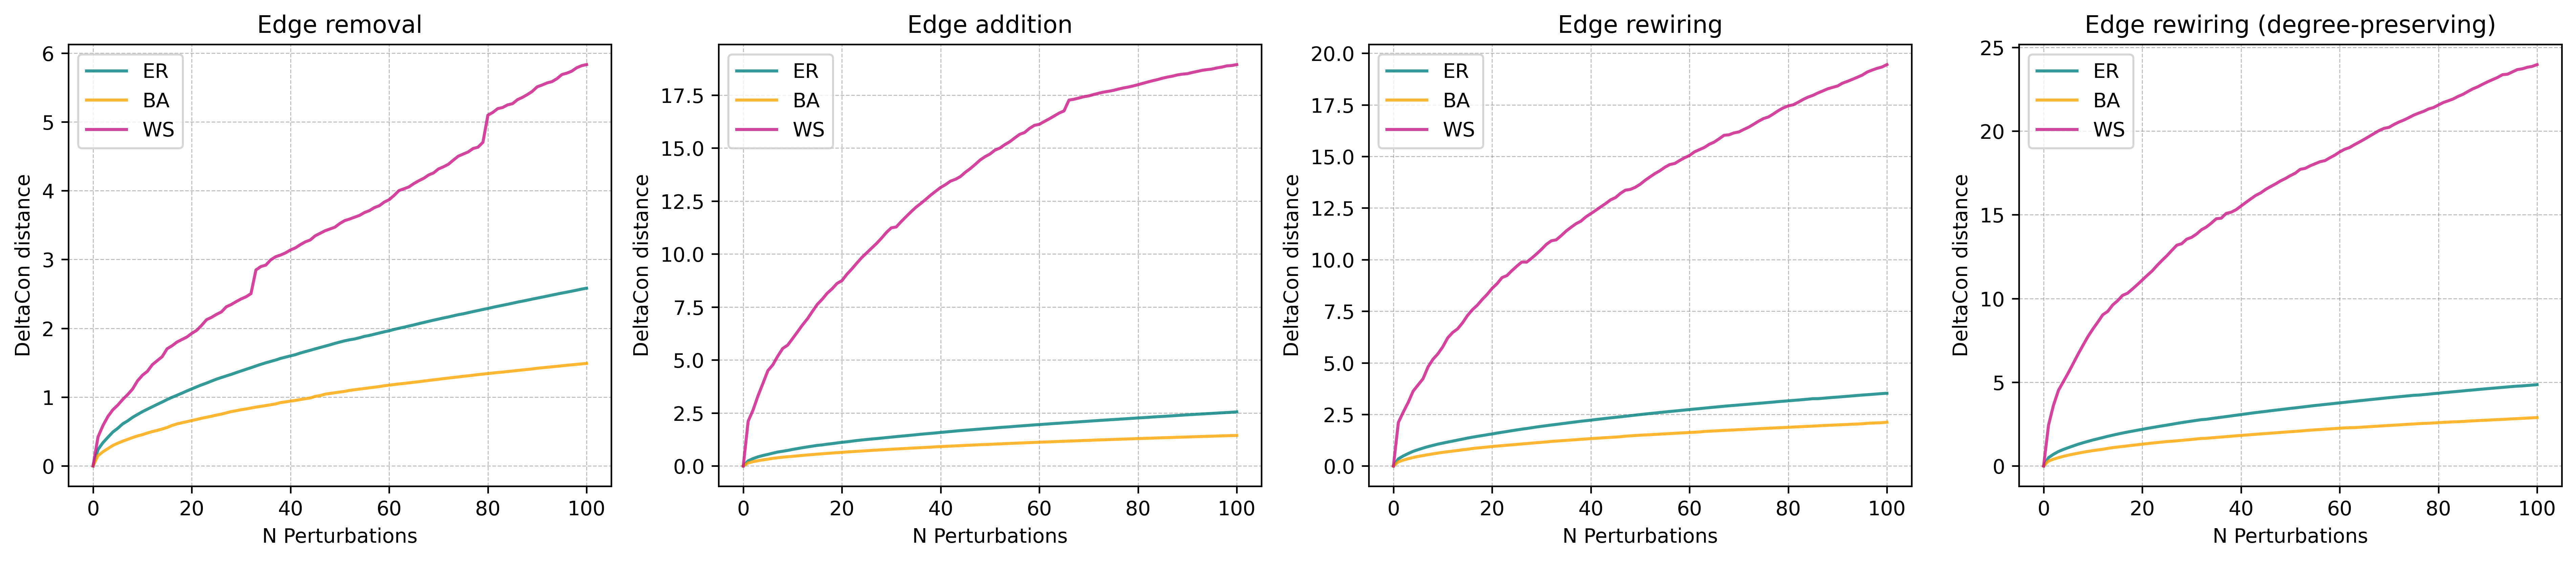

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4), dpi=425)

# Define colors and labels
colors = {'ER': 'teal', 'BA': 'orange', 'WS': 'mediumvioletred'}
graphs = ['er', 'ba', 'ws']

# Plot each perturbation type
perturbation_types = ['remove_edge', 'add_edge', 'rewire_edge', 'rewire_preserve_degree']
titles = ['Edge removal', 'Edge addition', 'Edge rewiring', 'Edge rewiring (degree-preserving)']

for i, perturbation in enumerate(perturbation_types):
    for graph in graphs:
        label = graph.upper()
        ax[i].plot(results[f"{graph}_{perturbation}"], color=colors[label], alpha=0.8, label=label)
    
    # Formatting each subplot
    ax[i].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('N Perturbations')
    ax[i].set_ylabel('DeltaCon distance')
    ax[i].legend()

# Show the plot
plt.tight_layout()
plt.show()


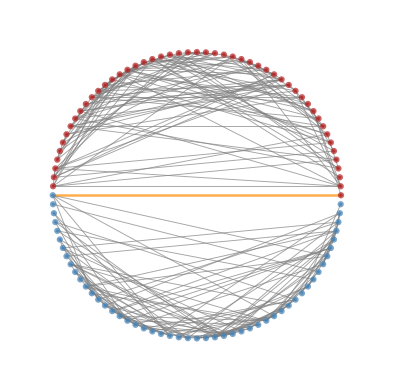

In [36]:
# Generate graphs
g1 = nx.gnp_random_graph(50, 0.1)
g2 = nx.gnp_random_graph(50, 0.1)
g3 = nx.disjoint_union(g1, g2)

# Add a single edge between node 0 and node 50
g3.add_edge(50, 0)

# Define node color based on the node range
node_colors = ['firebrick' if node < 50 else 'steelblue' for node in g3.nodes]

# Define edge color, with special color for the edge between node 0 and node 50
edge_colors = ['darkorange' if (u == 0 and v == 50) or (u == 50 and v == 0) else 'gray' for u, v in g3.edges]

edge_widths = [0.8 if (u == 0 and v == 50) or (u == 50 and v == 0) else 0.3 for u, v in g3.edges]

# Draw the graph with specified node and edge colors
fig, ax = plt.subplots(1, 1, figsize=(2, 2), dpi=225)
pos = nx.circular_layout(g3)
nx.draw(g3, node_size = 1, width=edge_widths, pos=pos, alpha = 0.7, node_color=node_colors, edge_color=edge_colors, ax=ax)

plt.show()


In [37]:

jacc_not_disconnecting = []
jacc_disconnecting = []
jsd_not_disconnecting = []
jsd_disconnecting = []
deltacon_not_disconnecting = []
deltacon_disconnecting = []

for i in range(100):
    g1 = nx.gnp_random_graph(50, 0.1)
    g2 = nx.gnp_random_graph(50, 0.1)
    g3 = nx.disjoint_union(g1, g2)
    g3.add_edge(0,50)
    g = g3.copy()
    rand_edge = random.choice(list(g.edges()))
    while rand_edge == (0,50) or rand_edge == (50,0):
        rand_edge = random.choice(list(g.edges()))
    g.remove_edge(*rand_edge)
    jacc_not_disconnecting.append(jaccard_distance(g,g3))
    jsd_not_disconnecting.append(jensen_shannon_divergence(g,g3))
    deltacon_not_disconnecting.append(deltacon(g,g3))

    g.add_edge(*rand_edge)
    g.remove_edge(0,50)
    jacc_disconnecting.append(jaccard_distance(g,g3))
    jsd_disconnecting.append(jensen_shannon_divergence(g,g3))
    deltacon_disconnecting.append(deltacon(g,g3))

jacc_nd = np.mean(jacc_not_disconnecting)
jacc_d = np.mean(jacc_disconnecting)
jsd_nd = np.mean(jsd_not_disconnecting)
jsd_d = np.mean(jsd_disconnecting)
deltacon_nd = np.mean(deltacon_not_disconnecting)
deltacon_d = np.mean(deltacon_disconnecting)

import pandas as pd
df = pd.DataFrame({'not disconnecting': [jacc_nd, jsd_nd, deltacon_nd],
                   'disconnecting': [jacc_d, jsd_d, deltacon_d]}, index = ['Jaccard', 'Degree JSD', 'DeltaCon'])
df


not disconnecting  disconnecting
Jaccard              0.004062       0.004062
Degree JSD           0.001210       0.001088
DeltaCon             0.470306       0.861621

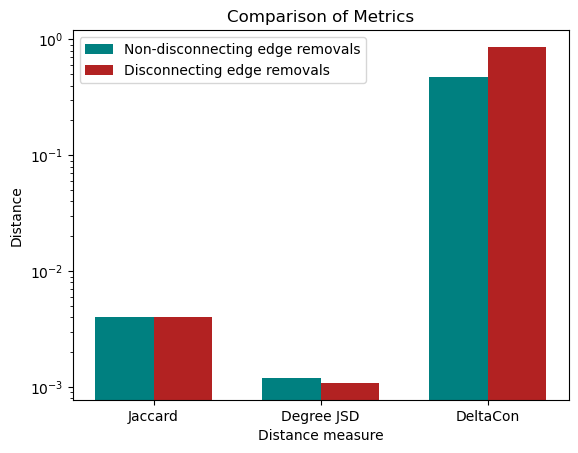

In [38]:
# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(df.index))

# Create the plot
fig, ax = plt.subplots()

# Plot the bars
bar1 = ax.bar(index, df['not disconnecting'], bar_width, label='Non-disconnecting edge removals', color='teal')
bar2 = ax.bar(index + bar_width, df['disconnecting'], bar_width, label='Disconnecting edge removals', color='firebrick')

# Add labels, title, and legend
ax.set_xlabel('Distance measure')
ax.set_ylabel('Distance')
ax.set_title('Comparison of Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df.index)
ax.set_yscale('log')
ax.legend()

# Show the plot
plt.show()

____

## Application 1: Temporal anomaly detection
- Question: given a temporal network, can we use graph distances to identify moments where the graph changes a lot or very suddenly?
- Dataset: **High school dynamic contact networks** from [SocioPatterns](http://www.sociopatterns.org/datasets/high-school-dynamic-contact-networks/)


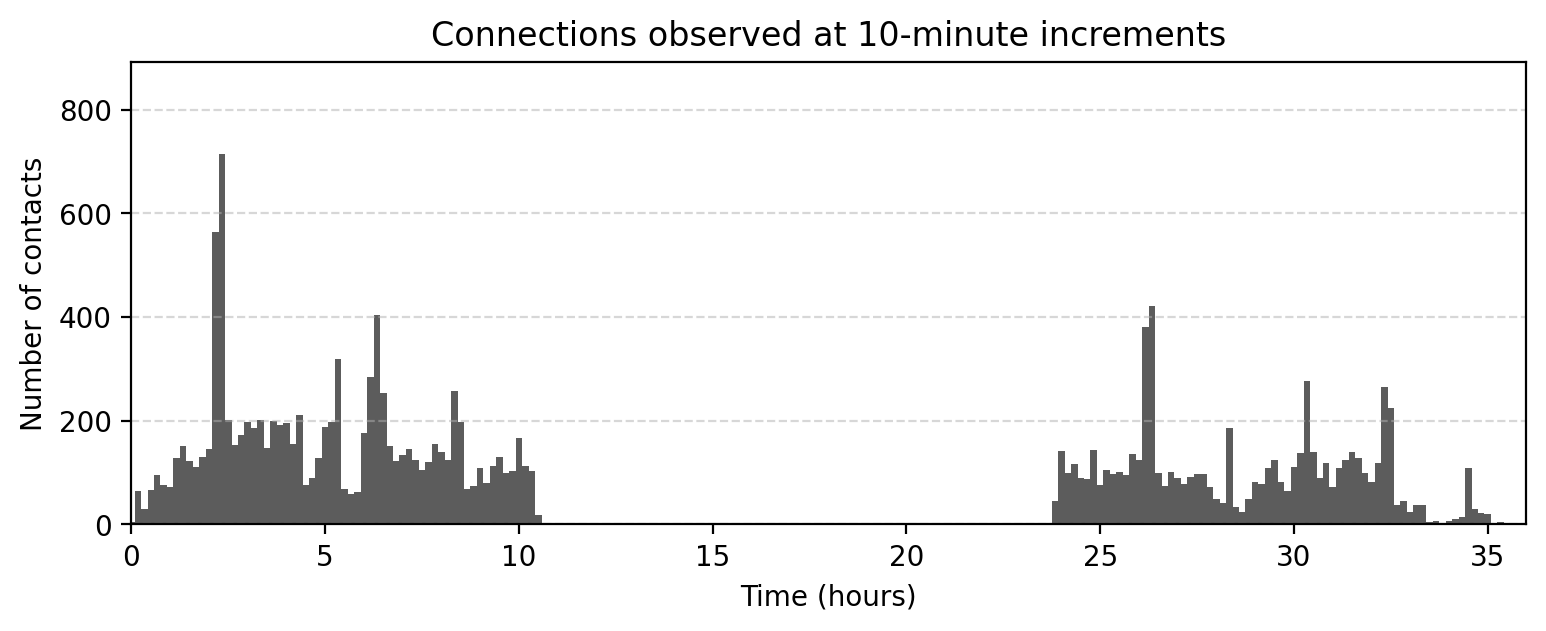

In [ ]:
# Reading data
tdf = pd.read_csv('data/sp.tsv', sep='\t', header=None,
                  names=['timestamp', 'node_i', 'node_j'])[['node_i', 'node_j', 'timestamp']]

# Define bin size and create time bins
bin_size = 60 * 10  # 10 minutes
tdf["time_bin"] = (tdf['timestamp'] // bin_size) * bin_size

# Aggregate counts
aggregate_counts = tdf["time_bin"].value_counts().sort_index()

# Convert time_bin to hours
aggregate_counts.index = aggregate_counts.index / 3600

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(9, 3), dpi=200)

# Bar plot
ax.bar(aggregate_counts.index, aggregate_counts.values, width=bin_size / 3600, color='.2', alpha=0.8)

# Grid
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Set x-ticks at absolute 24-hour intervals
start_time = aggregate_counts.index.min()
end_time = aggregate_counts.index.max()

# Labels and title
ax.set_title(f"Connections observed at {10}-minute increments")
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Number of contacts")

# Set x-limits
ax.set_xlim(0, 36)  

# Show plot
plt.show()

In [39]:
import pandas as pd
tdf = pd.read_csv('data/sp.tsv',sep='\t',header=None,
                  names=['timestamp','node_i','node_j'])[['node_i','node_j','timestamp']]
bin_size = 60*1 # 1 minute
tdf["time_bin"] = (tdf['timestamp'] // bin_size) * bin_size

In [40]:
def temporal_network_from_data(
    data,
    aggregation="all",
    interval_size=1,
    time_window=None,
    custom_slices=None,
    directed=False,
    multigraph=False,
    column_names=None
):
    """
    Convert temporal edge data into NetworkX graph objects with flexible temporal aggregation.

    This function processes temporal edge data (provided as a DataFrame, CSV file, or NumPy array)
    to create NetworkX graphs. It supports various temporal aggregation methods, including grouping
    by fixed intervals, custom time slices, or a single aggregated graph for all data.

    Parameters:
    ----------
    data : pd.DataFrame, str, or np.ndarray
        Input temporal edge data. Can be:
        - A Pandas DataFrame with required columns: 'node_i', 'node_j', 'timestamp'.
        - A file path to a CSV file (requires `column_names` to be specified).
        - A NumPy array with columns matching the required structure (requires `column_names`).

    aggregation : str, optional
        Temporal aggregation method. Options are:
        - 'interval': Group data into fixed time intervals (specified by `interval_size`).
        - 'custom': Group data based on custom time slices (specified by `custom_slices`).
        - 'all': Aggregate all data into a single graph.
        Default is 'all'.

    interval_size : int, optional
        Size of the time intervals (in seconds) for 'interval' aggregation. Default is 1.

    time_window : tuple, optional
        A tuple `(start, stop)` to filter timestamps within a specific range (in seconds).
        Default is None, which includes all timestamps.

    custom_slices : list, optional
        List of custom slice sizes (in seconds) for 'custom' aggregation. For example, [3600, 7200]
        would create two time bins of 1 hour and 2 hours, respectively. Default is None.

    directed : bool, optional
        If True, creates directed graphs (DiGraph or MultiDiGraph). Default is False.

    multigraph : bool, optional
        If True, creates MultiGraphs or MultiDiGraphs to allow parallel edges. If False,
        standard Graph or DiGraph objects are created, and weights are aggregated. Default is False.

    column_names : list, optional
        Required when `data` is a CSV file or NumPy array. Specifies the column names as:
        ['node_i', 'node_j', 'timestamp', (optional) 'weight'].

    Returns:
    -------
    dict or networkx.Graph
        - If data is aggregated into multiple time bins (e.g., 'interval' or 'custom'), returns a
          dictionary where keys are time bins and values are NetworkX graph objects.
        - If data is aggregated into a single graph (e.g., 'all'), returns a single NetworkX graph.

    Raises:
    ------
    ValueError
        - If required columns ('node_i', 'node_j', 'timestamp') are missing.
        - If `custom_slices` is not provided for 'custom' aggregation.
        - If `column_names` is not provided when input data is a CSV file or NumPy array.

    TypeError
        - If input data is not a Pandas DataFrame, a CSV file path, or a NumPy array.

    Examples:
    --------
    1. Aggregating into a single graph:
        >>> G_agg = temporal_network_from_data(data, aggregation="all")

    2. Aggregating into 1-hour intervals:
        >>> G_interval = temporal_network_from_data(data, aggregation="interval", interval_size=3600)

    3. Using custom time slices:
        >>> G_custom = temporal_network_from_data(data, aggregation="custom", custom_slices=[3600, 7200])

    4. Handling a CSV file:
        >>> G_csv = temporal_network_from_data("edges.csv",
                                               column_names=["node_i","node_j","timestamp","weight"])

    Notes:
    -----
    - The 'weight' column, if present, is aggregated for standard graphs (not MultiGraphs).
    - The timestamp column must be numeric and represents time in seconds.
    """

    # Handle data input
    if isinstance(data, pd.DataFrame):
        df = data
    elif isinstance(data, str):  # CSV file path
        if column_names is None:
            raise ValueError("Column names must be provided when reading from a CSV file.")
        df = pd.read_csv(data, names=column_names)
    elif isinstance(data, np.ndarray):  # NumPy array
        if column_names is None:
            raise ValueError("Column names must be provided for a NumPy array.")
        df = pd.DataFrame(data, columns=column_names)
    else:
        raise TypeError("Input data must be a Pandas DataFrame, a CSV file path, or a NumPy array.")
    
    # Check required columns
    required_columns = {"node_i", "node_j", "timestamp"}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"Input data must contain {required_columns} columns.")
    
    # Filter by time window
    if time_window:
        start, stop = time_window
        df = df[(df["timestamp"] >= start) & (df["timestamp"] <= stop)]
    
    # Determine time bins
    if aggregation == "interval":
        df["time_bin"] = (df["timestamp"] // interval_size) * interval_size
    elif aggregation == "custom":
        if not custom_slices:
            raise ValueError("Custom slices must be provided for 'custom' aggregation.")
        time_bins = []
        current_start = df["timestamp"].min()
        for slice_size in custom_slices:
            current_end = current_start + slice_size
            time_bins.append((current_start, current_end))
            current_start = current_end
        
        # Assign rows to custom time bins
        def assign_to_custom_bin(ts):
            for i, (start, end) in enumerate(time_bins):
                if start <= ts < end:
                    return i
            return None  # Outside custom slices
        
        df["time_bin"] = df["timestamp"].apply(assign_to_custom_bin)
        df = df[df["time_bin"].notnull()]  # Remove rows outside custom slices
    elif aggregation == "all":
        df["time_bin"] = "all"  # Single graph for all data
    else:
        raise ValueError(f"Unsupported aggregation type: {aggregation}")
    
    # Group by time bins and create graphs
    graphs = {}
    for time_bin, group in df.groupby("time_bin"):
        # Determine graph type
        if multigraph:
            G = nx.MultiDiGraph() if directed else nx.MultiGraph()
        else:
            G = nx.DiGraph() if directed else nx.Graph()
        
        # Aggregate weights if multigraph is False
        if not multigraph:
            edge_weights = (
                group.groupby(["node_i", "node_j"])
                .agg(weight=("weight", "sum") if "weight" in group.columns else ("timestamp", "size"))
                .reset_index()
            )
            for _, row in edge_weights.iterrows():
                G.add_edge(row["node_i"], row["node_j"], weight=row["weight"])
        else:  # Add edges directly without aggregation
            for _, row in group.iterrows():
                G.add_edge(
                    row["node_i"], 
                    row["node_j"], 
                    weight=row.get("weight", 1), 
                    timestamp=row["timestamp"]
                )
        
        graphs[time_bin] = G
    
    # Return a single graph if no aggregation
    if aggregation == "all" or (aggregation == "custom" and len(graphs) == 1):
        return graphs["all"]

    return graphs

In [41]:
g_t = temporal_network_from_data(tdf,
                                 aggregation="interval",
                                 interval_size=60*10)
# g_t = {k: g_t[k] for k in list(g_t.keys())[:(60*24)]}
g_agg = temporal_network_from_data(tdf,
                                   aggregation="all")
for key, value in g_t.items():
    value.add_nodes_from(g_agg)

In [42]:
import numpy as np

def normalized_temporal_distance(graph_dict, distance_function):
    """
    Computes normalized temporal distances for a dictionary of {timestamp: graph}.
    
    Parameters:
        graph_dict (dict): A dictionary where keys are timestamps (sorted) and values are graph objects.
        distance_function (function): A function that takes two graphs and returns a distance measure.

    Returns:
        dict: A dictionary where keys are timestamps (starting from the second timestamp)
              and values are normalized temporal distances.
    """
    # Ensure the timestamps are sorted
    timestamps = sorted(graph_dict.keys())
    
    # Compute temporal distances
    temporal_distances = []
    for i in range(1, len(timestamps)):
        G_prev = graph_dict[timestamps[i - 1]]
        G_curr = graph_dict[timestamps[i]]
        temporal_distances.append(distance_function(G_prev, G_curr))
    
    # Compute mean of temporal distances
    mean_distance = np.mean(temporal_distances)
    
    # Normalize distances
    normalized_distances = {timestamps[i]: dist / mean_distance for i, dist in enumerate(temporal_distances, start=1)}
    
    return normalized_distances


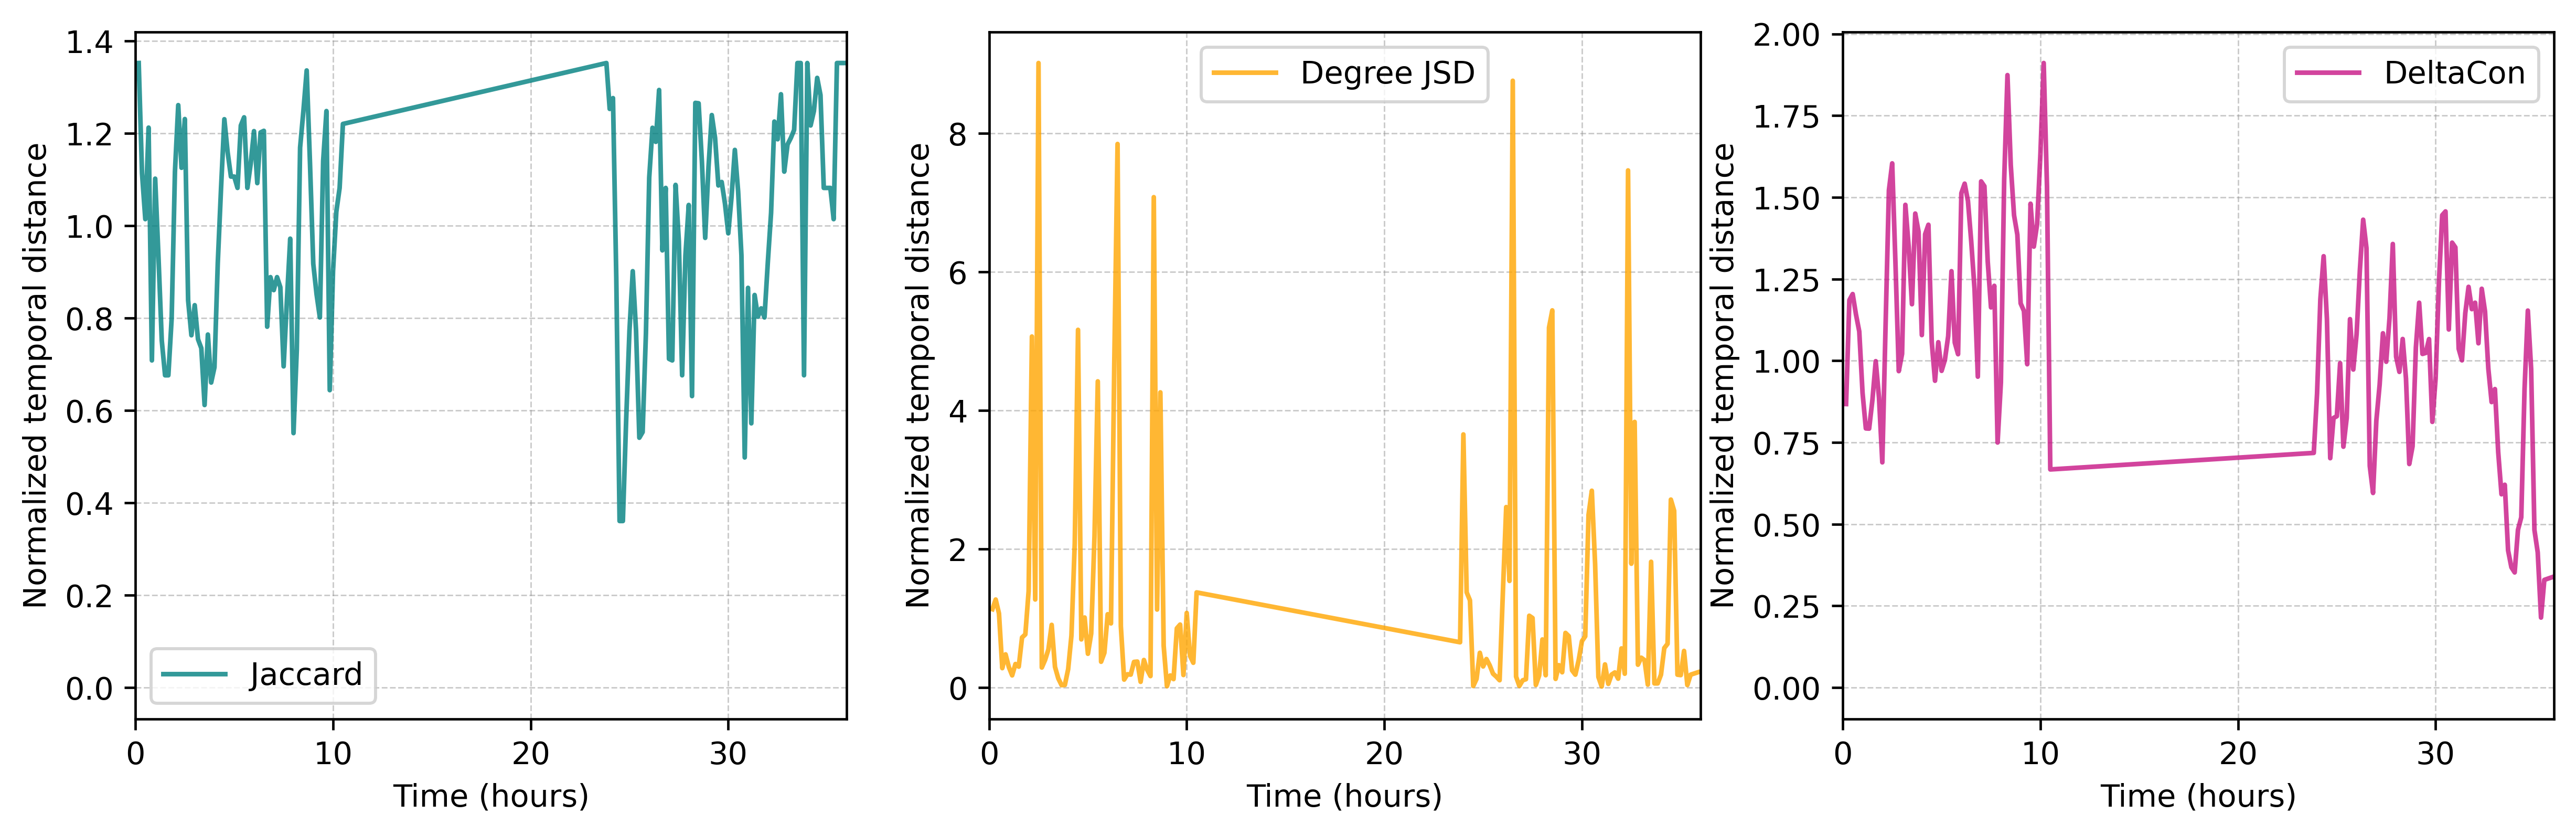

In [69]:
fig, ax = plt.subplots(1,3, figsize=(14,4), dpi = 425)
D = normalized_temporal_distance(g_t, netrd.distance.JaccardDistance())
ax[0].plot([d/(60*60) for d in D.keys()], D.values(), color = 'teal', alpha = 0.8, label = 'Jaccard')
ax[0].set_xlim(0, 36)
ax[0].grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Normalized temporal distance')
ax[0].legend()
D = normalized_temporal_distance(g_t, netrd.distance.DegreeDivergence())
ax[1].plot([d/(60*60) for d in D.keys()], D.values(), color = 'orange', alpha = 0.8, label = 'Degree JSD')
ax[1].set_xlim(0, 36)
ax[1].grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Normalized temporal distance')
ax[1].legend()
D = normalized_temporal_distance(g_t, netrd.distance.DeltaCon())
ax[2].plot([d/(60*60) for d in D.keys()], D.values(), color = 'mediumvioletred', alpha = 0.8, label = 'DeltaCon')
ax[2].set_xlim(0, 36)
ax[2].grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax[2].set_xlabel('Time (hours)')
ax[2].set_ylabel('Normalized temporal distance')
ax[2].legend()

____

## Application 2: Graph classification
- Question: Given a set of networks of different groups, can we use graph distances to classify or cluster them, recovering the original grouping
- Dataset: [Brain connectomes](https://fcon_1000.projects.nitrc.org/indi/retro/cobre.html) of control and individuals with schizophrenia 

In [6]:
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
import fastcluster
from tqdm import tqdm
import scipy
import netrd

In [3]:
gnp_graphs = [nx.gnp_random_graph(100, 0.1) for _ in range(10)]

ba_graphs = [nx.barabasi_albert_graph(100, 6) for _ in range(10)]

ws_graphs = [nx.watts_strogatz_graph(100, 4, 0.1) for _ in range(10)]

gnp_graphs2 = [nx.gnp_random_graph(100, 0.01) for _ in range(10)]

ba_graphs2 = [nx.barabasi_albert_graph(100, 2) for _ in range(10)]

ws_graphs2 = [nx.watts_strogatz_graph(100, 6, 0.05) for _ in range(10)]

graphs = gnp_graphs + ba_graphs + ws_graphs + gnp_graphs2 + ba_graphs2 + ws_graphs2

In [4]:
len(graphs)

60

100%|██████████| 60/60 [00:04<00:00, 12.50it/s]


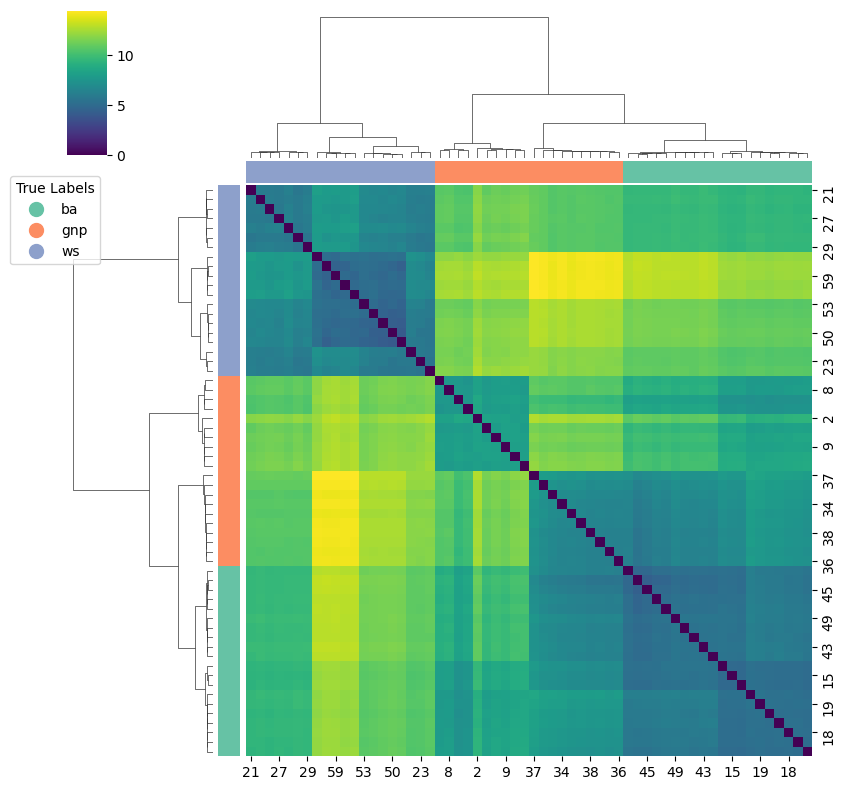

In [10]:
# True labels for the graphs
true_labels = ['gnp']*10 + ['ba']*10 + ['ws']*10 + ['gnp']*10 + ['ba']*10 + ['ws']*10

# Map labels to colors
unique_labels = np.unique(true_labels)
label_to_color = dict(zip(unique_labels, sns.color_palette("Set2", len(unique_labels))))
row_colors = np.array([label_to_color[label] for label in true_labels])  # Map each label to its color

# Compute pairwise distance matrix
n = len(graphs)
distance_matrix = np.zeros((n, n))
for i in tqdm(range(n)):
    for j in range(i + 1, n):
        distance = netrd.distance.DeltaCon().dist(graphs[i], graphs[j])
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance
# Convert the distance matrix to a DataFrame
distance_df = pd.DataFrame(distance_matrix)

# Perform clustering
Z = linkage(squareform(distance_matrix), method='average')

# Create a clustermap
clustermap = sns.clustermap(
    distance_df,
    method='ward',
    cmap='viridis',
    figsize=(8, 8),
    row_colors=row_colors, 
    col_colors=row_colors,  
);

# Add a color legend below
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=label)
                  for label, color in label_to_color.items()]
plt.legend(handles=legend_handles, title="True Labels", bbox_to_anchor=(1, -0.1), loc='best')
plt.show()

In [21]:
path = '/Users/nima/Desktop/PhD/PHYS 7332/final_project/data/1328237/connectomes_cobre_scale_20.mat'
mat_data = scipy.io.loadmat(path)
keys = list(mat_data.keys())
adjacency_block_matrix = mat_data[keys[3]]
graphs = []
for i in range(adjacency_block_matrix.shape[2]):
    G = nx.from_numpy_array(adjacency_block_matrix[:,:,i])
    graphs.append(G)

In [22]:
file_path = "/Users/nima/Desktop/PhD/PHYS 7332/final_project/data/1328237/3307139_subjects.txt"

with open(file_path, 'r') as file:
    subjects_list = file.readlines()

# Remove any trailing newline characters
subjects_list = [line.strip() for line in subjects_list]

true_labels = ['control' if entry.startswith('c') else 'schizophrenia' for entry in subjects_list]

In [23]:
def retain_edges_above_threshold(graph, threshold):
    """
    Retain only edges with weight above a certain threshold.
    
    Parameters:
    graph (networkx.Graph): The input graph.
    threshold (float): The weight threshold.
    
    Returns:
    networkx.Graph: A new graph with only edges above the threshold.
    """
    new_graph = graph.copy()
    edges_to_remove = [(u, v) for u, v, w in graph.edges(data='weight') if w <= threshold]
    new_graph.remove_edges_from(edges_to_remove)
    return new_graph

threshold = 0.75
filtered_graph = retain_edges_above_threshold(graphs[0], threshold)
nx.density(filtered_graph)

0.13157894736842105

In [36]:
import math
def disparity_filter(G, alpha=0.05):
    """
    Apply the disparity filter to a weighted graph.
    
    Parameters:
        G (networkx.Graph): A weighted graph.
        alpha (float): Significance level for edge retention.
        
    Returns:
        networkx.Graph: A graph with edges retained based on the disparity filter.
    """
    backbone = nx.Graph()
    backbone.add_nodes_from(G.nodes(data=True))  # Preserve node attributes
    
    for u in G.nodes:
        neighbors = list(G[u])
        k = len(neighbors)
        if k < 2:  # Cannot compute disparity for degree < 2
            continue
        
        total_weight = sum(G[u][v]['weight'] for v in neighbors)
        
        for v in neighbors:
            w = G[u][v]['weight']
            p_ij = w / total_weight
            if p_ij > 0 and k > 1:
                significance = 1 - (1 - p_ij) ** (k - 1)
            else:
                significance = 0

            
            if significance < alpha:  # Edge passes the test
                backbone.add_edge(u, v, weight=w)
    
    return backbone

In [15]:
def disparity_filter_adaptive(G, alpha_func=lambda k: 1 / (k + 1)):
    backbone = nx.Graph()
    backbone.add_nodes_from(G.nodes(data=True))
    
    for u in G.nodes:
        neighbors = list(G[u])
        k = len(neighbors)
        if k < 2:
            continue
        
        total_weight = sum(G[u][v]['weight'] for v in neighbors)
        alpha = alpha_func(k)  # Adaptive alpha based on degree
        
        for v in neighbors:
            w = G[u][v]['weight']
            p_ij = w / total_weight
            significance = 1 - (1 - p_ij) ** (k - 1)
            
            if significance < alpha:
                backbone.add_edge(u, v, weight=w)
    
    return backbone


In [18]:
nx.density(graphs[0])
g1 = disparity_filter_adaptive(graphs[0])
nx.density(g1)
g2 = disparity_filter_adaptive(graphs[1])
nx.density(g1)
netrd.distance.DegreeDivergence().dist(g1, g2)

/opt/anaconda3/envs/PhD_2025/lib/python3.12/site-packages/netrd/utilities/graph.py:118: RuntimeWarning: Coercing weighted graph to unweighted.
  warnings.warn("Coercing weighted graph to unweighted.", RuntimeWarning)


0.10031585659188025

100%|██████████| 146/146 [01:26<00:00,  1.70it/s]


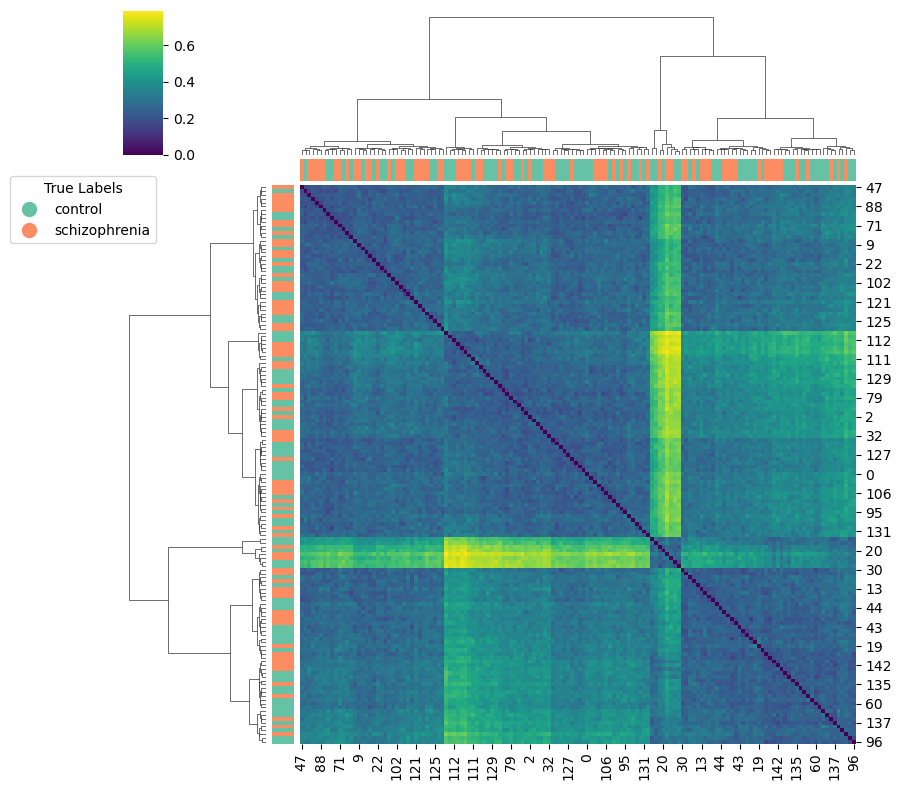

In [43]:
# True labels for the graphs
true_labels = true_labels

# Map labels to colors
unique_labels = np.unique(true_labels)
label_to_color = dict(zip(unique_labels, sns.color_palette("Set2", len(unique_labels))))
row_colors = np.array([label_to_color[label] for label in true_labels])  # Map each label to its color

# Compute pairwise distance matrix
n = len(graphs)
distance_matrix = np.zeros((n, n))
for i in tqdm(range(n)):
    for j in range(i + 1, n):
        threshold = 0.10
        g1 = retain_edges_above_threshold(graphs[i], threshold)
        g2 = retain_edges_above_threshold(graphs[j], threshold)
        # g1 = disparity_filter(graphs[i], 0.25)
        # g2 = disparity_filter(graphs[j], 0.25)
        # g1 = retain_edges_above_threshold(g1, 0.50)
        # g2 = retain_edges_above_threshold(g2, 0.50)
        # g1 = disparity_filter_adaptive(graphs[i])
        # g2 = disparity_filter_adaptive(graphs[j])
        # g1 = graphs[i]
        # g2 = graphs[j]
        distance = netrd.distance.PortraitDivergence().dist(g1, g2)
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance
# Convert the distance matrix to a DataFrame
distance_df = pd.DataFrame(distance_matrix)

# Perform clustering
Z = linkage(squareform(distance_matrix), method='average')

# Create a clustermap
clustermap = sns.clustermap(
    distance_df,
    method='ward',
    cmap='viridis',
    figsize=(8, 8),
    row_colors=row_colors, 
    col_colors=row_colors,  
)

# Add a color legend below
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=label)
                  for label, color in label_to_color.items()]
plt.legend(handles=legend_handles, title="True Labels", bbox_to_anchor=(1, -0.1), loc='best')
plt.show()


_____

## Application 3: Within Ensemble Graph Distance
- Question: How can we determine if the distance measured between two graphs is large or small? How can we standardize graph distance measures?

In [312]:
import networkx as nx
import numpy as np
from typing import Callable

def within_ensemble_graph_distance(graph_gen_func, distance_func, n):
    """
    Calculate the within-ensemble graph distance.

    Parameters:
        graph_gen_func (Callable[[], nx.Graph]): A function that generates a graph.
        distance_func (Callable[[nx.Graph, nx.Graph], float]): A function that computes the distance between two graphs.
        n (int): Number of pairs of graphs to generate.

    Returns:
        float: The average distance between pairs of graphs generated from the same ensemble.
    """
    total_distance = 0.0
    for _ in range(n):
        graph1 = graph_gen_func()
        graph2 = graph_gen_func()
        distance = distance_func(graph1, graph2)
        total_distance += distance

    average_distance = total_distance / n
    return average_distance


In [313]:
wegds_jacc = []
p = np.arange(0.02, 1.0, 0.02)
for i in p:
    def random_graph_generator():
        return nx.erdos_renyi_graph(n=100, p=i)
    wegd = within_ensemble_graph_distance(random_graph_generator, 
                                      netrd.distance.JaccardDistance().dist, 
                                      n=100)
    wegds_jacc.append(wegd)

wegds_jsd = []
p = np.arange(0.02, 1.0, 0.02)
for i in p:
    def random_graph_generator():
        return nx.erdos_renyi_graph(n=100, p=i)
    wegd = within_ensemble_graph_distance(random_graph_generator, 
                                      netrd.distance.DegreeDivergence().dist, 
                                      n=100)
    wegds_jsd.append(wegd)

wegds_dc = []
p = np.arange(0.02, 1.0, 0.02)
for i in p:
    def random_graph_generator():
        return nx.erdos_renyi_graph(n=100, p=i)
    wegd = within_ensemble_graph_distance(random_graph_generator, 
                                      netrd.distance.DeltaCon().dist, 
                                      n=100)
    wegds_dc.append(wegd)

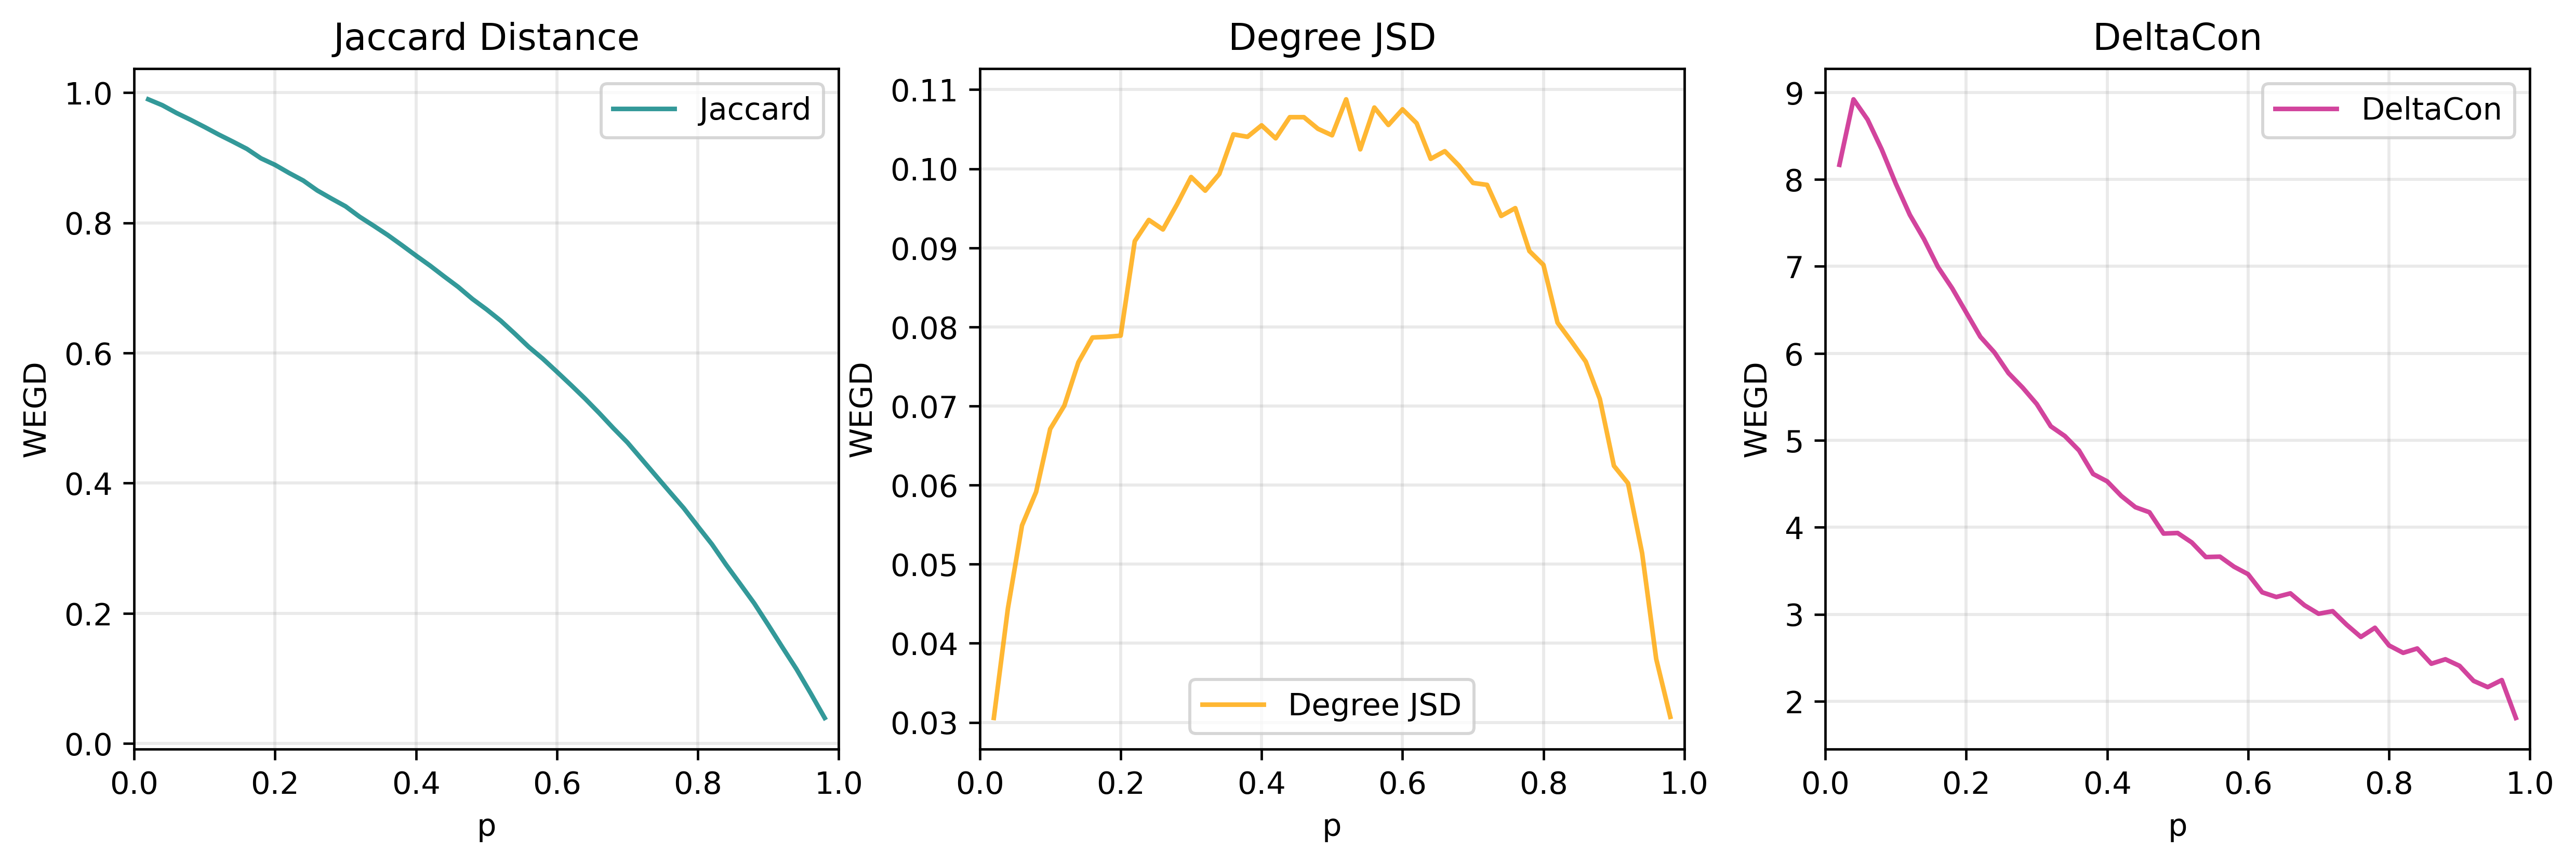

In [314]:
fig, ax = plt.subplots(1,3, figsize=(14,4), dpi = 425)

ax[0].plot(p, wegds_jacc, color = 'teal', alpha = 0.8, label = 'Jaccard')
ax[0].set_title('Jaccard Distance')
ax[0].set_xlabel('p')
ax[0].set_ylabel('WEGD')
ax[0].grid(linewidth=1.0, color='#999999', alpha=0.2, linestyle='-')
ax[0].set_xlim(0.0, 1.0)
ax[0].legend()

ax[1].plot(p, wegds_jsd, color = 'orange', alpha = 0.8, label = 'Degree JSD')
ax[1].set_title('Degree JSD')
ax[1].set_xlabel('p')
ax[1].set_ylabel('WEGD')
ax[1].grid(linewidth=1.0, color='#999999', alpha=0.2, linestyle='-')
ax[1].set_xlim(0.0, 1.0)
ax[1].legend()

ax[2].plot(p, wegds_dc, color = 'mediumvioletred', alpha = 0.8, label = 'DeltaCon')
ax[2].set_title('DeltaCon')
ax[2].set_xlabel('p')
ax[2].set_ylabel('WEGD')
ax[2].grid(linewidth=1.0, color='#999999', alpha=0.2, linestyle='-')
ax[2].set_xlim(0.0, 1.0)
ax[2].legend()

In [315]:
import numpy as np
import networkx as nx
import netrd 

def generate_pa_network(N, m, alpha=1, g=nx.complete_graph(4)):
    """
    Generates a graph using a generalized preferential attachment model with non-linear attachment probabilities.

    Parameters:
    -----------
    N : int
        The total number of nodes in the resulting graph.
    m : int
        The number of edges to attach from each new node to existing nodes.
    alpha : float, optional
        The exponent for the attachment probability. Default is 1 (linear preferential attachment).
    g : networkx.Graph, optional
        The initial graph to start the process (default is a complete graph with 4 nodes).
        The graph must contain at least `m` nodes to allow for the attachment of new nodes.

    Returns:
    --------
    g : networkx.Graph
        The generated graph with `N` nodes.
    """
    # Use a default initial graph if none is provided
    if g is None:
        g = nx.complete_graph(4)
    # Ensure the initial graph has at least `m` nodes
    if g.number_of_nodes() < m:
        raise ValueError("Initial graph must have at least `m` nodes.")
    # Get the current number of nodes in the initial graph
    n_nodes = g.number_of_nodes()
    while n_nodes < N:
        # Get a dictionary of node degrees
        degree_dict = dict(g.degree())
        # Calculate attachment probabilities proportional to degree^alpha
        degrees = np.array(list(degree_dict.values()))
        probabilities = degrees ** alpha
        probabilities /= probabilities.sum()
        # Get the list of existing node IDs
        potential_node_partners = np.array(list(degree_dict.keys()))
        # Select `m` nodes based on the attachment probabilities
        node_partners = np.random.choice(potential_node_partners, p=probabilities, size=m, replace=False)
        # Add edges from the new node to selected nodes
        new_edges = [(n_nodes, j) for j in node_partners]
        g.add_edges_from(new_edges)
        # Increment the node count for the newly added node
        n_nodes += 1

    return g

def generate_pa_network_callable(N, m, alpha=1, initial_graph=None):
    """
    Returns a function that generates graphs using the generalized preferential attachment model.

    Parameters:
    -----------
    N : int
        The total number of nodes in the generated graphs.
    m : int
        The number of edges to attach from each new node to existing nodes.
    alpha : float, optional
        The exponent for the attachment probability. Default is 1 (linear preferential attachment).
    initial_graph : networkx.Graph, optional
        The initial graph to start the process (default is a complete graph with 4 nodes).
        The graph must contain at least `m` nodes.

    Returns:
    --------
    Callable[[], nx.Graph]
        A function that generates graphs according to the specified parameters.
    """
    def graph_generator():
        g = initial_graph.copy() if initial_graph else nx.complete_graph(4)
        return generate_pa_network(N, m, alpha, g)
    
    return graph_generator

In [316]:
wegds_jacc = []
a = np.arange(-5, 5, 0.5)
for i in a:
    pa_graph_gen = generate_pa_network_callable(N=100, m=2, alpha=i)
    wegd = within_ensemble_graph_distance(pa_graph_gen, 
                                      netrd.distance.JaccardDistance().dist, 
                                      n=100)
    wegds_jacc.append(wegd)

wegds_jsd = []
a = np.arange(-5, 5, 0.5)
for i in a:
    pa_graph_gen = generate_pa_network_callable(N=100, m=2, alpha=i)
    wegd = within_ensemble_graph_distance(pa_graph_gen, 
                                      netrd.distance.DegreeDivergence().dist, 
                                      n=100)
    wegds_jsd.append(wegd)

wegds_dc = []
a = np.arange(-5, 5, 0.5)
for i in a:
    pa_graph_gen = generate_pa_network_callable(N=100, m=2, alpha=i)
    wegd = within_ensemble_graph_distance(pa_graph_gen, 
                                      netrd.distance.DeltaCon().dist, 
                                      n=100)
    wegds_dc.append(wegd)

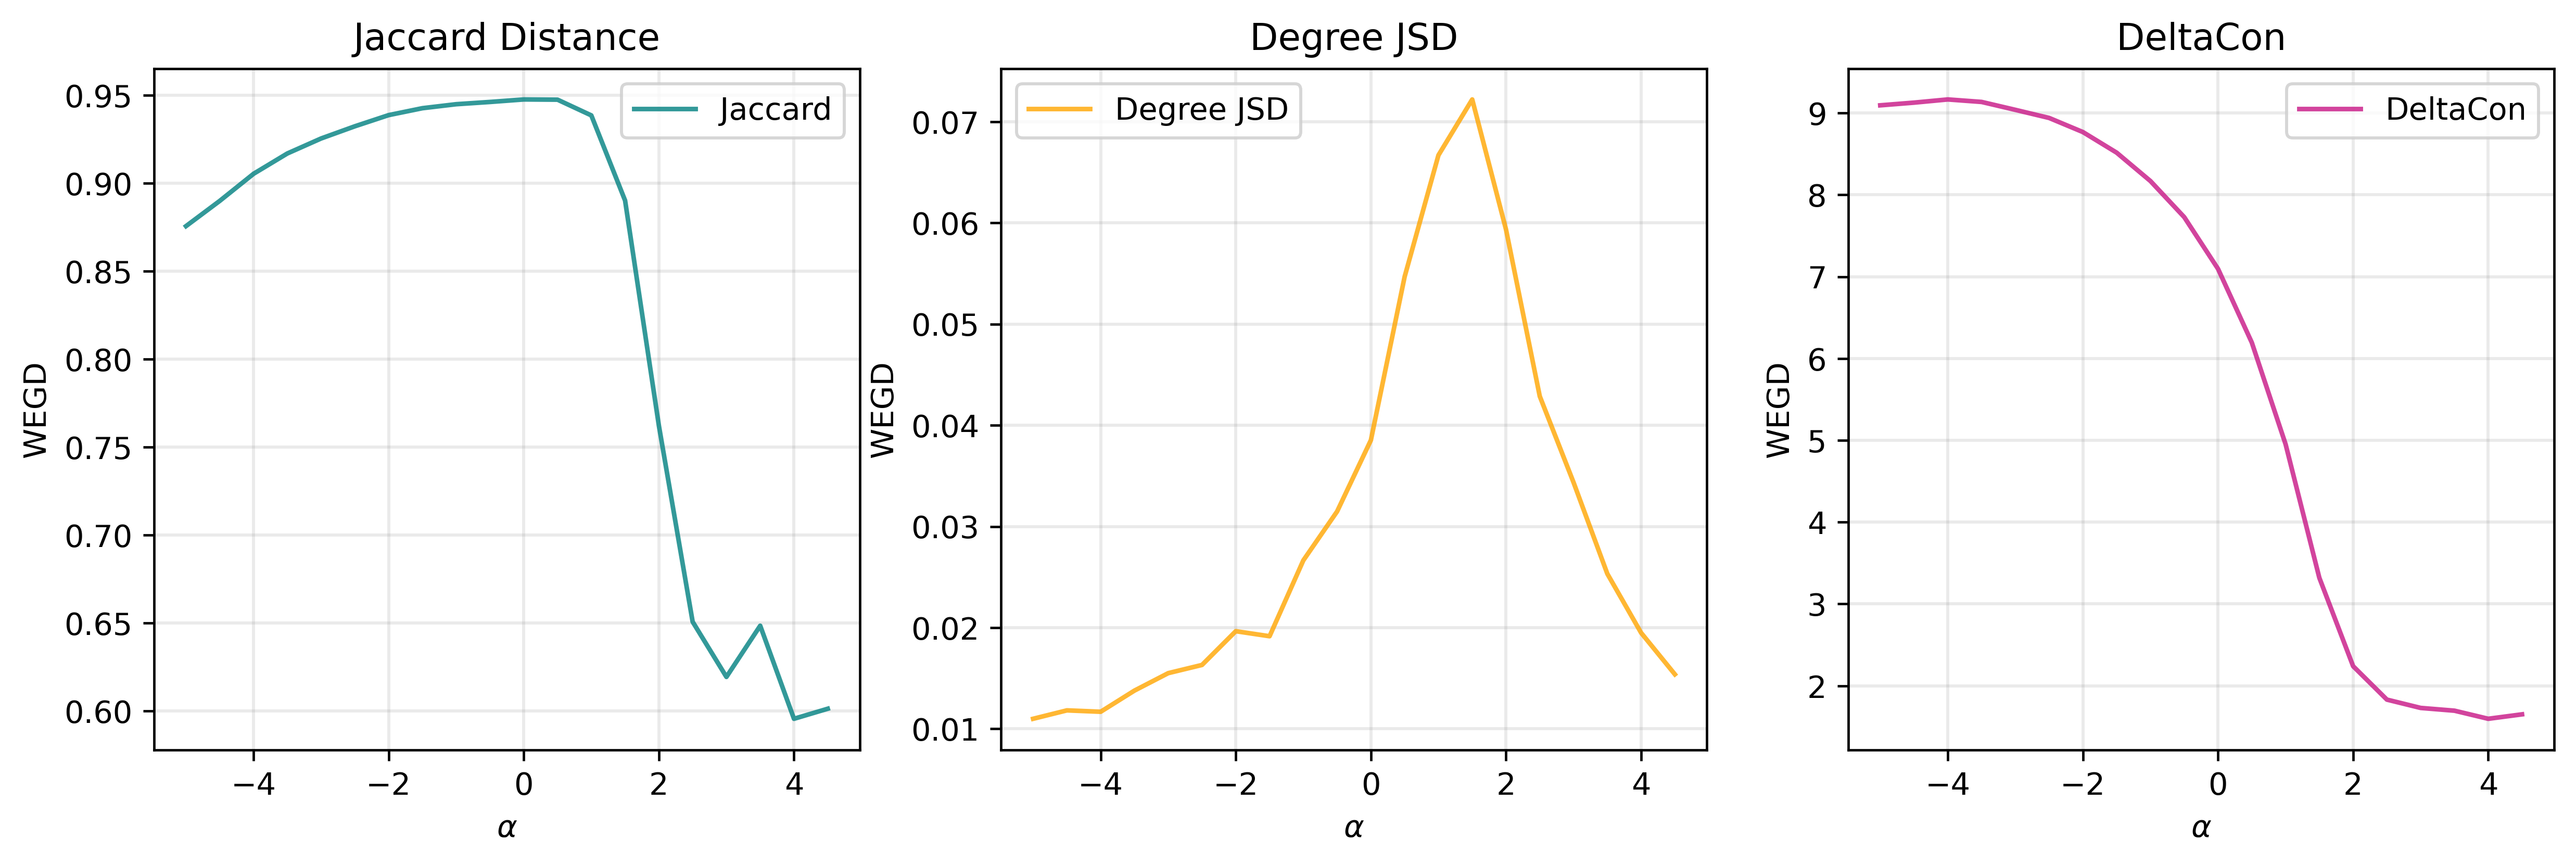

In [317]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(14,4), dpi = 425)

ax[0].plot(a, wegds_jacc, color = 'teal', alpha = 0.8, label = 'Jaccard')
ax[0].set_title('Jaccard Distance')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('WEGD')
ax[0].grid(linewidth=1.0, color='#999999', alpha=0.2, linestyle='-')
ax[0].legend()

ax[1].plot(a, wegds_jsd, color = 'orange', alpha = 0.8, label = 'Degree JSD')
ax[1].set_title('Degree JSD')
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel('WEGD')
ax[1].grid(linewidth=1.0, color='#999999', alpha=0.2, linestyle='-')
ax[1].legend()

ax[2].plot(a, wegds_dc, color = 'mediumvioletred', alpha = 0.8, label = 'DeltaCon')
ax[2].set_title('DeltaCon')
ax[2].set_xlabel(r'$\alpha$')
ax[2].set_ylabel('WEGD')
ax[2].grid(linewidth=1.0, color='#999999', alpha=0.2, linestyle='-')
ax[2].legend()

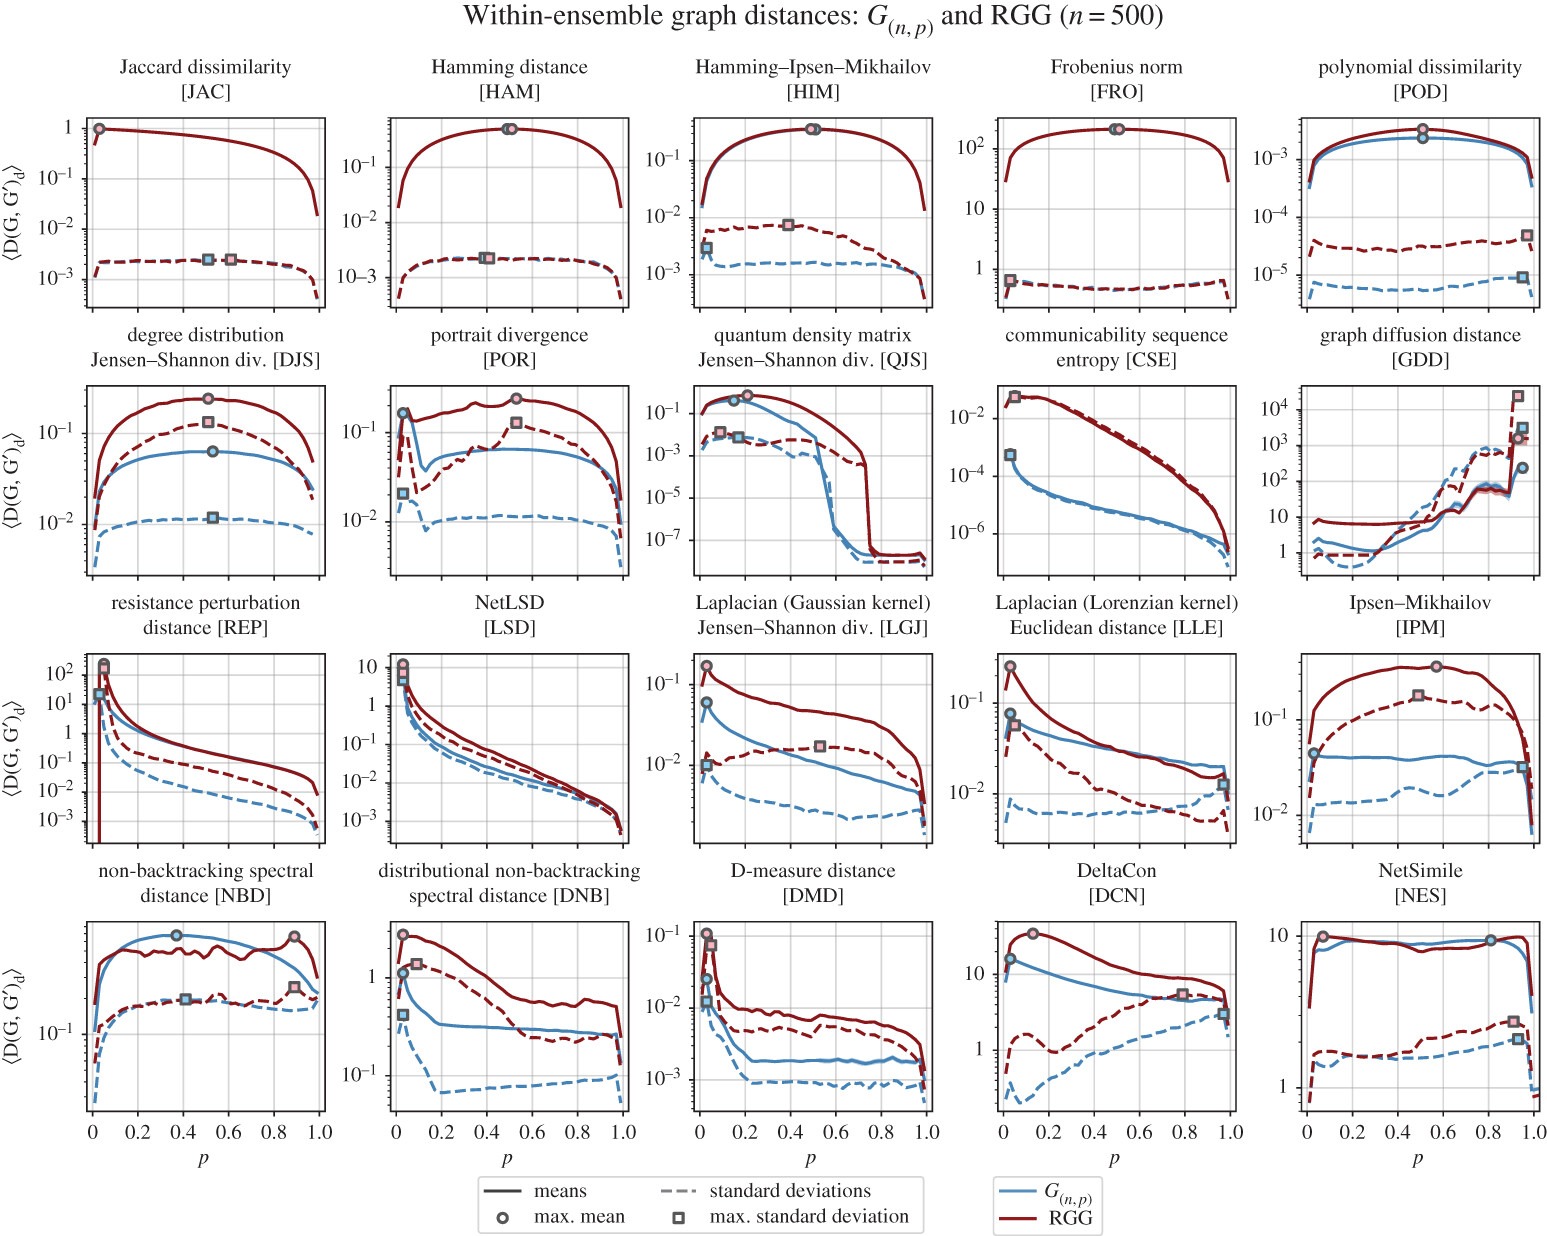

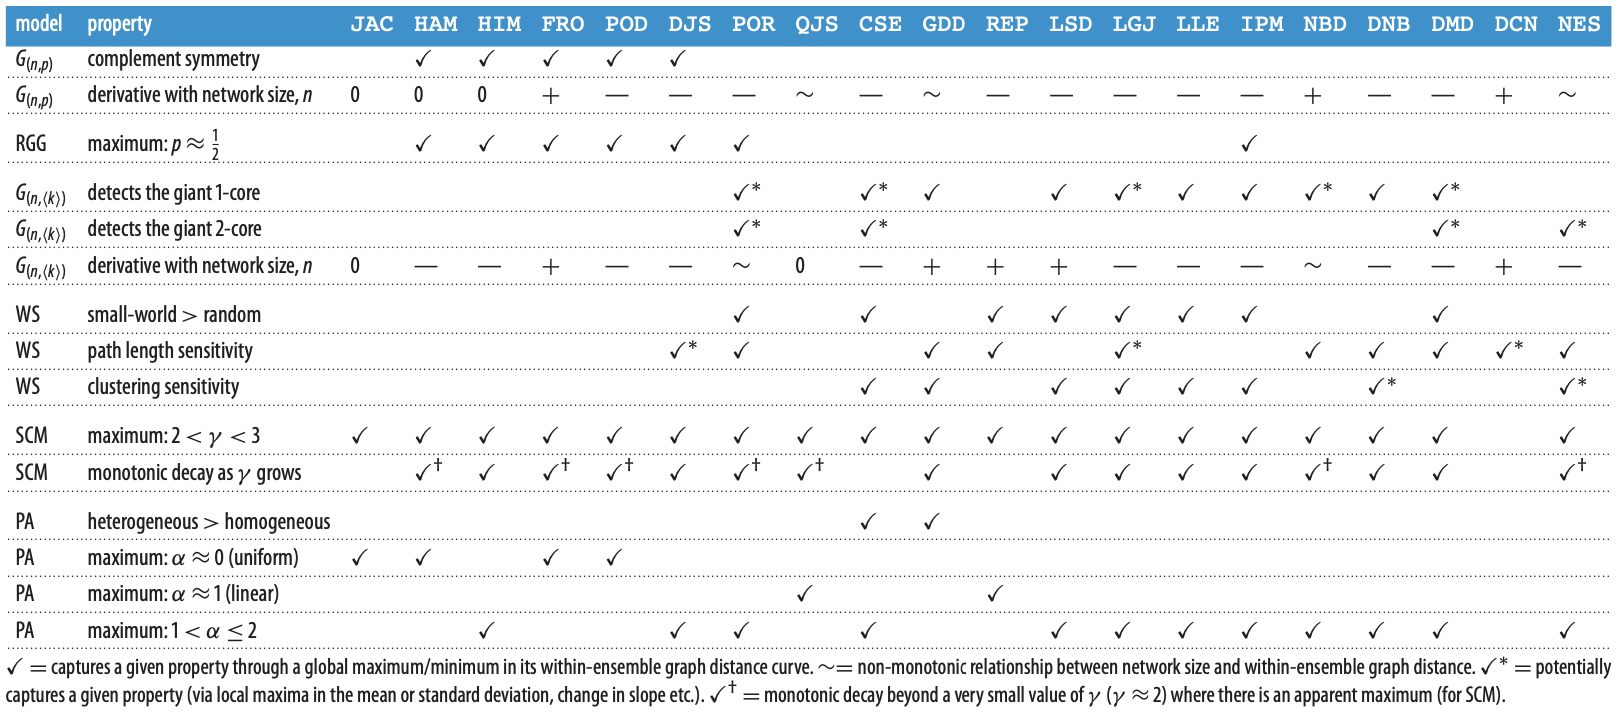

For more on this, see:

- Hartle, H., Klein, B., McCabe, S., Daniels, A., St-Onge, G., Murphy, C., Hébert-Dufresne, L., 2020. Network comparison and the within-ensemble graph distance. Proc. R. Soc. A. 476, 20190744. https://doi.org/10.1098/rspa.2019.0744


_______

## References and further resources:

1. Hartle, H., Klein, B., McCabe, S., Daniels, A., St-Onge, G., Murphy, C., Hébert-Dufresne, L., 2020. Network comparison and the within-ensemble graph distance. Proc. R. Soc. A. 476, 20190744. https://doi.org/10.1098/rspa.2019.0744
2. Soundarajan, S., Eliassi-Rad, T., Gallagher, B., 2014. A Guide to Selecting a Network Similarity Method, in: Proceedings of the 2014 SIAM International Conference on Data Mining. Presented at the Proceedings of the 2014 SIAM International Conference on Data Mining, Society for Industrial and Applied Mathematics, pp. 1037–1045. https://doi.org/10.1137/1.9781611973440.118
3. Tantardini, M., Ieva, F., Tajoli, L., Piccardi, C., 2019. Comparing methods for comparing networks. Sci Rep 9, 17557. https://doi.org/10.1038/s41598-019-53708-y
4. Wills, P., Meyer, F.G., 2020. Metrics for graph comparison: A practitioner’s guide. PLoS ONE 15, e0228728. https://doi.org/10.1371/journal.pone.0228728
5. Koutra, D., Vogelstein, J.T., Faloutsos, C., 2013. DeltaCon : A Principled Massive-Graph Similarity Function, in: Proceedings of the 2013 SIAM International Conference on Data Mining. Presented at the Proceedings of the 2013 SIAM International Conference on Data Mining, Society for Industrial and Applied Mathematics, pp. 162–170. https://doi.org/10.1137/1.9781611972832.18
6. Koutra, D., Shah, N., Vogelstein, J.T., Gallagher, B., Faloutsos, C., 2016. DeltaCon: Principled Massive-Graph Similarity Function with Attribution. ACM Trans. Knowl. Discov. Data 10, 1–43. https://doi.org/10.1145/2824443
7. Berlingerio, M., Koutra, D., Eliassi-Rad, T., Faloutsos, C., 2012. NetSimile: A Scalable Approach to Size-Independent Network Similarity. https://doi.org/10.48550/ARXIV.1209.2684
7. McCabe, S., Torres, L., LaRock, T., Haque, S., Yang, C.-H., Hartle, H., Klein, B., 2021. netrd: A library for network reconstruction and graph distances. JOSS 6, 2990. https://doi.org/10.21105/joss.02990
8. [netrd package](https://github.com/netsiphd/netrd/)
9. [NetComp package](https://github.com/peterewills/NetComp/tree/master)
